<a href="https://colab.research.google.com/github/JeelCueva/omega-data-website/blob/main/ANALISIS_ECONOMETRICO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
import os
warnings.filterwarnings('ignore')

# Configuración para gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("="*80)
print("ANÁLISIS ECONOMÉTRICO DE INVERSIÓN PÚBLICA Y CRECIMIENTO ECONÓMICO")
print("="*80)

# ============================================================================
# 1. CREACIÓN DEL DATAFRAME CON LOS DATOS ORIGINALES
# ============================================================================

datos = {
    'Año': [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
            2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'GTR': [23722.59, 49611.16, 65448.59, 74767.39, 73773.64, 159251.05,
            128565.81, 111997.73, 121108.18, 156713.07, 182844.40, 316096.23,
            354945.94, 387496.77, 394662.52, 438217.36, 482684.10],
    'GE': [13184.05, 20457.65, 40623.22, 23536.16, 8847.14, 20310.16,
           10258.08, 21035.07, 13600.25, 14562.56, 3107.33, 12823.43,
           18005.97, 4894.16, 20489.56, 11538.71, 12697.19],
    'GT': [587.54, 164.70, 393.56, 112.60, 206.24, 140.90,
           131.85, 892.61, 62.39, 145.13, 44.03, 345.40,
           55929.88, 967.53, 49173.66, 20074.48, 56068.43],
    'PBI': [3200861.00, 3464132.00, 3499798.00, 3739082.00, 3955589.00,
            4380310.00, 4642728.00, 4799787.00, 5114983.00, 5345445.00,
            5832171.00, 6010056.00, 6081484.00, 5437276.00, 5969184.00,
            6221658.00, 6590342.00]
}

df = pd.DataFrame(datos)
df.set_index('Año', inplace=True)

print("\n" + "="*80)
print("DATOS ORIGINALES")
print("="*80)
print(df)
print("\nEstadísticas descriptivas:")
print(df.describe())

# ============================================================================
# 2. GRÁFICAS Y ANÁLISIS DE TENDENCIA DE DATOS ORIGINALES
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS GRÁFICO DE TENDENCIAS")
print("="*80)

# Crear el directorio 'outputs' si no existe
output_dir = '/mnt/user-data/outputs/'
os.makedirs(output_dir, exist_ok=True)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# PBI
axes[0, 0].plot(df.index, df['PBI'], marker='o', linewidth=2, markersize=6, color='blue')
axes[0, 0].set_title('Evolución del PBI (2007-2023)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Año')
axes[0, 0].set_ylabel('Miles de S/.')
axes[0, 0].grid(True, alpha=0.3)

# Gasto en Transporte
axes[0, 1].plot(df.index, df['GTR'], marker='s', linewidth=2, markersize=6, color='green')
axes[0, 1].set_title('Gasto en Transporte Terrestre', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Año')
axes[0, 1].set_ylabel('Miles de S/.')
axes[0, 1].grid(True, alpha=0.3)

# Gasto en Energía
axes[1, 0].plot(df.index, df['GE'], marker='^', linewidth=2, markersize=6, color='red')
axes[1, 0].set_title('Gasto en Energía', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Año')
axes[1, 0].set_ylabel('Miles de S/.')
axes[1, 0].grid(True, alpha=0.3)

# Gasto en Telecomunicaciones
axes[1, 1].plot(df.index, df['GT'], marker='D', linewidth=2, markersize=6, color='purple')
axes[1, 1].set_title('Gasto en Telecomunicaciones', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Año')
axes[1, 1].set_ylabel('Miles de S/.')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/1_tendencias_datos_originales.pdf', dpi=300, bbox_inches='tight')
plt.close()

print("✓ Gráfica de tendencias guardada")

# ============================================================================
# 3. ANÁLISIS DE NORMALIDAD DE DATOS ORIGINALES
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE NORMALIDAD DE DATOS ORIGINALES")
print("="*80)

fig, axes = plt.subplots(2, 4, figsize=(18, 8))

for idx, var in enumerate(['PBI', 'GTR', 'GE', 'GT']):
    # Histograma
    axes[0, idx].hist(df[var], bins=8, edgecolor='black', alpha=0.7)
    axes[0, idx].set_title(f'Histograma - {var}')
    axes[0, idx].set_xlabel('Valor')
    axes[0, idx].set_ylabel('Frecuencia')

    # Q-Q plot
    stats.probplot(df[var], dist="norm", plot=axes[1, idx])
    axes[1, idx].set_title(f'Q-Q Plot - {var}')

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/2_normalidad_datos_originales.pdf', dpi=300, bbox_inches='tight')
plt.close()

# Test de Shapiro-Wilk
print("\nPrueba de Normalidad de Shapiro-Wilk:")
for var in ['PBI', 'GTR', 'GE', 'GT']:
    stat, p_value = stats.shapiro(df[var])
    print(f"{var}: Estadístico = {stat:.4f}, p-value = {p_value:.4f}")
    if p_value > 0.05:
        print(f"  → Los datos de {var} siguen una distribución normal (p > 0.05)")
    else:
        print(f"  → Los datos de {var} NO siguen una distribución normal (p < 0.05)")

# ============================================================================
# 4. CONVERSIÓN A LOGARITMOS
# ============================================================================

print("\n" + "="*80)
print("CONVERSIÓN DE DATOS A LOGARITMOS")
print("="*80)

df_log = pd.DataFrame()
df_log['Log_PBI'] = np.log(df['PBI'])
df_log['Log_GTR'] = np.log(df['GTR'])
df_log['Log_GE'] = np.log(df['GE'])
df_log['Log_GT'] = np.log(df['GT'])
df_log.index = df.index

print(df_log)

# Gráficas de datos logarítmicos
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].plot(df_log.index, df_log['Log_PBI'], marker='o', linewidth=2, color='blue')
axes[0, 0].set_title('Log(PBI)', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(df_log.index, df_log['Log_GTR'], marker='s', linewidth=2, color='green')
axes[0, 1].set_title('Log(GTR)', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(df_log.index, df_log['Log_GE'], marker='^', linewidth=2, color='red')
axes[1, 0].set_title('Log(GE)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(df_log.index, df_log['Log_GT'], marker='D', linewidth=2, color='purple')
axes[1, 1].set_title('Log(GT)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/3_datos_logaritmicos.pdf', dpi=300, bbox_inches='tight')
plt.close()

print("✓ Gráfica de datos logarítmicos guardada")

# ============================================================================
# 5. MODELO DE REGRESIÓN MÚLTIPLE
# ============================================================================

print("\n" + "="*80)
print("MODELO DE REGRESIÓN MÚLTIPLE")
print("log(PBI) = α0 + α1·log(GTR) + α2·log(GE) + α3·log(GT) + μ")
print("="*80)

# Preparar variables
X_multiple = df_log[['Log_GTR', 'Log_GE', 'Log_GT']]
y = df_log['Log_PBI']
X_multiple = sm.add_constant(X_multiple)

# Ajustar modelo
modelo_multiple = sm.OLS(y, X_multiple).fit()

print("\n" + "-"*80)
print("RESULTADOS DEL MODELO MÚLTIPLE")
print("-"*80)
print(modelo_multiple.summary())

# Ecuación estimada
print("\n" + "-"*80)
print("ECUACIÓN ESTIMADA:")
print("-"*80)
coef = modelo_multiple.params
print(f"log(PBI) = {coef['const']:.6f} + {coef['Log_GTR']:.6f}·log(GTR) + {coef['Log_GE']:.6f}·log(GE) + {coef['Log_GT']:.6f}·log(GT)")

# ============================================================================
# 6. ANÁLISIS DE MULTICOLINEALIDAD (VIF)
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE MULTICOLINEALIDAD - Factor de Inflación de Varianza (VIF)")
print("="*80)

X_sin_constante = df_log[['Log_GTR', 'Log_GE', 'Log_GT']]
vif_data = pd.DataFrame()
vif_data["Variable"] = X_sin_constante.columns
vif_data["VIF"] = [variance_inflation_factor(X_sin_constante.values, i) for i in range(X_sin_constante.shape[1])]

print(vif_data)
print("\nInterpretación:")
print("VIF < 5: No hay multicolinealidad")
print("VIF 5-10: Multicolinealidad moderada")
print("VIF > 10: Multicolinealidad alta")

# ============================================================================
# 7. ANÁLISIS DE NORMALIDAD DE RESIDUOS
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE NORMALIDAD DE RESIDUOS - MODELO MÚLTIPLE")
print("="*80)

residuos = modelo_multiple.resid

# Test de Shapiro-Wilk
stat, p_value = stats.shapiro(residuos)
print(f"\nPrueba de Shapiro-Wilk:")
print(f"Estadístico = {stat:.4f}, p-value = {p_value:.4f}")
if p_value > 0.05:
    print("→ Los residuos siguen una distribución normal (p > 0.05)")
else:
    print("→ Los residuos NO siguen una distribución normal (p < 0.05)")

# Test de Jarque-Bera
jb_stat = stats.jarque_bera(residuos)
print(f"\nPrueba de Jarque-Bera:")
print(f"Estadístico = {jb_stat[0]:.4f}, p-value = {jb_stat[1]:.4f}")

# Gráficas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograma de residuos
axes[0, 0].hist(residuos, bins=10, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].axvline(residuos.mean(), color='red', linestyle='--', linewidth=2, label='Media')
axes[0, 0].set_title('Histograma de Residuos')
axes[0, 0].set_xlabel('Residuos')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].legend()

# Q-Q Plot
stats.probplot(residuos, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot de Residuos')

# Residuos vs Valores Ajustados
axes[1, 0].scatter(modelo_multiple.fittedvalues, residuos, alpha=0.7)
axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Valores Ajustados')
axes[1, 0].set_ylabel('Residuos')
axes[1, 0].set_title('Residuos vs Valores Ajustados')
axes[1, 0].grid(True, alpha=0.3)

# Residuos en el tiempo
axes[1, 1].plot(df_log.index, residuos, marker='o', linewidth=1)
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Año')
axes[1, 1].set_ylabel('Residuos')
axes[1, 1].set_title('Residuos en el Tiempo')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/4_analisis_residuos_multiple.pdf', dpi=300, bbox_inches='tight')
plt.close()

# ============================================================================
# 8. ANÁLISIS DE HETEROSCEDASTICIDAD
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE HETEROSCEDASTICIDAD - MODELO MÚLTIPLE")
print("="*80)

# Test de Breusch-Pagan
bp_test = het_breuschpagan(residuos, X_multiple)
print("\nPrueba de Breusch-Pagan:")
print(f"LM Estadístico = {bp_test[0]:.4f}")
print(f"p-value = {bp_test[1]:.4f}")
print(f"F-estadístico = {bp_test[2]:.4f}")
print(f"p-value (F) = {bp_test[3]:.4f}")
if bp_test[1] > 0.05:
    print("→ No hay evidencia de heteroscedasticidad (p > 0.05)")
else:
    print("→ Hay evidencia de heteroscedasticidad (p < 0.05)")

# Test de White
white_test = het_white(residuos, X_multiple)
print("\nPrueba de White:")
print(f"LM Estadístico = {white_test[0]:.4f}")
print(f"p-value = {white_test[1]:.4f}")
if white_test[1] > 0.05:
    print("→ No hay evidencia de heteroscedasticidad (p > 0.05)")
else:
    print("→ Hay evidencia de heteroscedasticidad (p < 0.05)")

# ============================================================================
# 9. ANÁLISIS DE AUTOCORRELACIÓN
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS DE AUTOCORRELACIÓN - MODELO MÚLTIPLE")
print("="*80)

# Durbin-Watson
dw = durbin_watson(residuos)
print(f"\nEstadístico Durbin-Watson: {dw:.4f}")
print("Interpretación:")
print("DW ≈ 2: No hay autocorrelación")
print("DW < 2: Autocorrelación positiva")
print("DW > 2: Autocorrelación negativa")
if 1.5 < dw < 2.5:
    print(f"→ No hay autocorrelación significativa (DW = {dw:.4f})")
elif dw < 1.5:
    print(f"→ Posible autocorrelación positiva (DW = {dw:.4f})")
else:
    print(f"→ Posible autocorrelación negativa (DW = {dw:.4f})")

# Gráficas ACF y PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(residuos, lags=8, ax=axes[0])
axes[0].set_title('Función de Autocorrelación (ACF)')

plot_pacf(residuos, lags=7, ax=axes[1])
axes[1].set_title('Función de Autocorrelación Parcial (PACF)')

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/5_autocorrelacion_multiple.pdf', dpi=300, bbox_inches='tight')
plt.close()

# ============================================================================
# 10. MODELO DE REGRESIÓN SIMPLE: PBI vs GTR
# ============================================================================

print("\n" + "="*80)
print("MODELO DE REGRESIÓN SIMPLE 1: PBI vs GASTO EN TRANSPORTE")
print("log(PBI) = β0 + β1·log(GTR) + μ")
print("="*80)

X_gtr = sm.add_constant(df_log['Log_GTR'])
modelo_gtr = sm.OLS(y, X_gtr).fit()

print("\n" + "-"*80)
print("RESULTADOS DEL MODELO")
print("-"*80)
print(modelo_gtr.summary())

# Ecuación
coef_gtr = modelo_gtr.params
print(f"\nECUACIÓN ESTIMADA:")
print(f"log(PBI) = {coef_gtr['const']:.6f} + {coef_gtr['Log_GTR']:.6f}·log(GTR)")

# Gráfica de ajuste
plt.figure(figsize=(10, 6))
plt.scatter(df_log['Log_GTR'], y, alpha=0.7, s=100, label='Datos observados')
plt.plot(df_log['Log_GTR'], modelo_gtr.fittedvalues, 'r-', linewidth=2, label='Línea de regresión')
plt.xlabel('Log(GTR)')
plt.ylabel('Log(PBI)')
plt.title('Regresión: Log(PBI) vs Log(GTR)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/mnt/user-data/outputs/6_regresion_gtr.pdf', dpi=300, bbox_inches='tight')
plt.close()

# Análisis de residuos
residuos_gtr = modelo_gtr.resid
dw_gtr = durbin_watson(residuos_gtr)

print(f"\nDurbin-Watson: {dw_gtr:.4f}")

stat_gtr, p_gtr = stats.shapiro(residuos_gtr)
print(f"Test Shapiro-Wilk: Estadístico = {stat_gtr:.4f}, p-value = {p_gtr:.4f}")

# ============================================================================
# 11. MODELO DE REGRESIÓN SIMPLE: PBI vs GE
# ============================================================================

print("\n" + "="*80)
print("MODELO DE REGRESIÓN SIMPLE 2: PBI vs GASTO EN ENERGÍA")
print("log(PBI) = γ0 + γ1·log(GE) + μ")
print("="*80)

X_ge = sm.add_constant(df_log['Log_GE'])
modelo_ge = sm.OLS(y, X_ge).fit()

print("\n" + "-"*80)
print("RESULTADOS DEL MODELO")
print("-"*80)
print(modelo_ge.summary())

# Ecuación
coef_ge = modelo_ge.params
print(f"\nECUACIÓN ESTIMADA:")
print(f"log(PBI) = {coef_ge['const']:.6f} + {coef_ge['Log_GE']:.6f}·log(GE)")

# Gráfica de ajuste
plt.figure(figsize=(10, 6))
plt.scatter(df_log['Log_GE'], y, alpha=0.7, s=100, label='Datos observados', color='red')
plt.plot(df_log['Log_GE'], modelo_ge.fittedvalues, 'b-', linewidth=2, label='Línea de regresión')
plt.xlabel('Log(GE)')
plt.ylabel('Log(PBI)')
plt.title('Regresión: Log(PBI) vs Log(GE)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/mnt/user-data/outputs/7_regresion_ge.pdf', dpi=300, bbox_inches='tight')
plt.close()

# Análisis de residuos
residuos_ge = modelo_ge.resid
dw_ge = durbin_watson(residuos_ge)

print(f"\nDurbin-Watson: {dw_ge:.4f}")

stat_ge, p_ge = stats.shapiro(residuos_ge)
print(f"Test Shapiro-Wilk: Estadístico = {stat_ge:.4f}, p-value = {p_ge:.4f}")

# ============================================================================
# 12. MODELO DE REGRESIÓN SIMPLE: PBI vs GT
# ============================================================================

print("\n" + "="*80)
print("MODELO DE REGRESIÓN SIMPLE 3: PBI vs GASTO EN TELECOMUNICACIONES")
print("log(PBI) = Ø0 + Ø1·log(GT) + μ")
print("="*80)

X_gt = sm.add_constant(df_log['Log_GT'])
modelo_gt = sm.OLS(y, X_gt).fit()

print("\n" + "-"*80)
print("RESULTADOS DEL MODELO")
print("-"*80)
print(modelo_gt.summary())

# Ecuación
coef_gt = modelo_gt.params
print(f"\nECUACIÓN ESTIMADA:")
print(f"log(PBI) = {coef_gt['const']:.6f} + {coef_gt['Log_GT']:.6f}·log(GT)")

# Gráfica de ajuste
plt.figure(figsize=(10, 6))
plt.scatter(df_log['Log_GT'], y, alpha=0.7, s=100, label='Datos observados', color='purple')
plt.plot(df_log['Log_GT'], modelo_gt.fittedvalues, 'g-', linewidth=2, label='Línea de regresión')
plt.xlabel('Log(GT)')
plt.ylabel('Log(PBI)')
plt.title('Regresión: Log(PBI) vs Log(GT)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/mnt/user-data/outputs/8_regresion_gt.pdf', dpi=300, bbox_inches='tight')
plt.close()

# Análisis de residuos
residuos_gt = modelo_gt.resid
dw_gt = durbin_watson(residuos_gt)

print(f"\nDurbin-Watson: {dw_gt:.4f}")

stat_gt, p_gt = stats.shapiro(residuos_gt)
print(f"Test Shapiro-Wilk: Estadístico = {stat_gt:.4f}, p-value = {p_gt:.4f}")

# ============================================================================
# 13. CUADRO RESUMEN COMPARATIVO
# ============================================================================

print("\n" + "="*80)
print("CUADRO RESUMEN COMPARATIVO DE TODOS LOS MODELOS")
print("="*80)

resumen = pd.DataFrame({
    'Modelo': ['Múltiple', 'Simple GTR', 'Simple GE', 'Simple GT'],
    'R²': [modelo_multiple.rsquared, modelo_gtr.rsquared, modelo_ge.rsquared, modelo_gt.rsquared],
    'R² Ajustado': [modelo_multiple.rsquared_adj, modelo_gtr.rsquared_adj, modelo_ge.rsquared_adj, modelo_gt.rsquared_adj],
    'F-estadístico': [modelo_multiple.fvalue, modelo_gtr.fvalue, modelo_ge.fvalue, modelo_gt.fvalue],
    'Prob(F)': [modelo_multiple.f_pvalue, modelo_gtr.f_pvalue, modelo_ge.f_pvalue, modelo_gt.f_pvalue],
    'Durbin-Watson': [dw, dw_gtr, dw_ge, dw_gt],
    'AIC': [modelo_multiple.aic, modelo_gtr.aic, modelo_ge.aic, modelo_gt.aic],
    'BIC': [modelo_multiple.bic, modelo_gtr.bic, modelo_ge.bic, modelo_gt.bic]
})

print("\n", resumen.to_string(index=False))

# Guardar resultados en CSV
resumen.to_csv('/mnt/user-data/outputs/resumen_modelos.csv', index=False)

# ============================================================================
# 14. MATRIZ DE CORRELACIÓN
# ============================================================================

print("\n" + "="*80)
print("MATRIZ DE CORRELACIÓN")
print("="*80)

correlacion = df_log.corr()
print(correlacion)

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Logarítmicas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/9_matriz_correlacion.pdf', dpi=300, bbox_inches='tight')
plt.close()

# ============================================================================
# 15. GRÁFICA COMPARATIVA DE MODELOS
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Valores reales vs predichos - Modelo Múltiple
axes[0, 0].scatter(y, modelo_multiple.fittedvalues, alpha=0.7, s=100)
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
axes[0, 0].set_xlabel('Log(PBI) Real')
axes[0, 0].set_ylabel('Log(PBI) Predicho')
axes[0, 0].set_title(f'Modelo Múltiple (R² = {modelo_multiple.rsquared:.4f})')
axes[0, 0].grid(True, alpha=0.3)

# Valores reales vs predichos - GTR
axes[0, 1].scatter(y, modelo_gtr.fittedvalues, alpha=0.7, s=100, color='green')
axes[0, 1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
axes[0, 1].set_xlabel('Log(PBI) Real')
axes[0, 1].set_ylabel('Log(PBI) Predicho')
axes[0, 1].set_title(f'Modelo GTR (R² = {modelo_gtr.rsquared:.4f})')
axes[0, 1].grid(True, alpha=0.3)

# Valores reales vs predichos - GE
axes[1, 0].scatter(y, modelo_ge.fittedvalues, alpha=0.7, s=100, color='red')
axes[1, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
axes[1, 0].set_xlabel('Log(PBI) Real')
axes[1, 0].set_ylabel('Log(PBI) Predicho')
axes[1, 0].set_title(f'Modelo GE (R² = {modelo_ge.rsquared:.4f})')
axes[1, 0].grid(True, alpha=0.3)

# Valores reales vs predichos - GT
axes[1, 1].scatter(y, modelo_gt.fittedvalues, alpha=0.7, s=100, color='purple')
axes[1, 1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
axes[1, 1].set_xlabel('Log(PBI) Real')
axes[1, 1].set_ylabel('Log(PBI) Predicho')
axes[1, 1].set_title(f'Modelo GT (R² = {modelo_gt.rsquared:.4f})')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/10_comparacion_modelos.pdf', dpi=300, bbox_inches='tight')
plt.close()

print("\n" + "="*80)
print("ANÁLISIS COMPLETADO")
print("="*80)
print("\nArchivos generados:")
print("1. tendencias_datos_originales.pdf")
print("2. normalidad_datos_originales.pdf")
print("3. datos_logaritmicos.pdf")
print("4. analisis_residuos_multiple.pdf")
print("5. autocorrelacion_multiple.pdf")
print("6. regresion_gtr.pdf")
print("7. regresion_ge.pdf")
print("8. regresion_gt.pdf")
print("9. matriz_correlacion.pdf")
print("10. comparacion_modelos.pdf")
print("11. resumen_modelos.csv")
print("\n" + "="*80)


ANÁLISIS ECONOMÉTRICO DE INVERSIÓN PÚBLICA Y CRECIMIENTO ECONÓMICO

DATOS ORIGINALES
            GTR        GE        GT        PBI
Año                                           
2007   23722.59  13184.05    587.54  3200861.0
2008   49611.16  20457.65    164.70  3464132.0
2009   65448.59  40623.22    393.56  3499798.0
2010   74767.39  23536.16    112.60  3739082.0
2011   73773.64   8847.14    206.24  3955589.0
2012  159251.05  20310.16    140.90  4380310.0
2013  128565.81  10258.08    131.85  4642728.0
2014  111997.73  21035.07    892.61  4799787.0
2015  121108.18  13600.25     62.39  5114983.0
2016  156713.07  14562.56    145.13  5345445.0
2017  182844.40   3107.33     44.03  5832171.0
2018  316096.23  12823.43    345.40  6010056.0
2019  354945.94  18005.97  55929.88  6081484.0
2020  387496.77   4894.16    967.53  5437276.0
2021  394662.52  20489.56  49173.66  5969184.0
2022  438217.36  11538.71  20074.48  6221658.0
2023  482684.10  12697.19  56068.43  6590342.0

Estadísticas descript

Mostrando todas las visualizaciones generadas:

Visualización: 1_tendencias_datos_originales.png


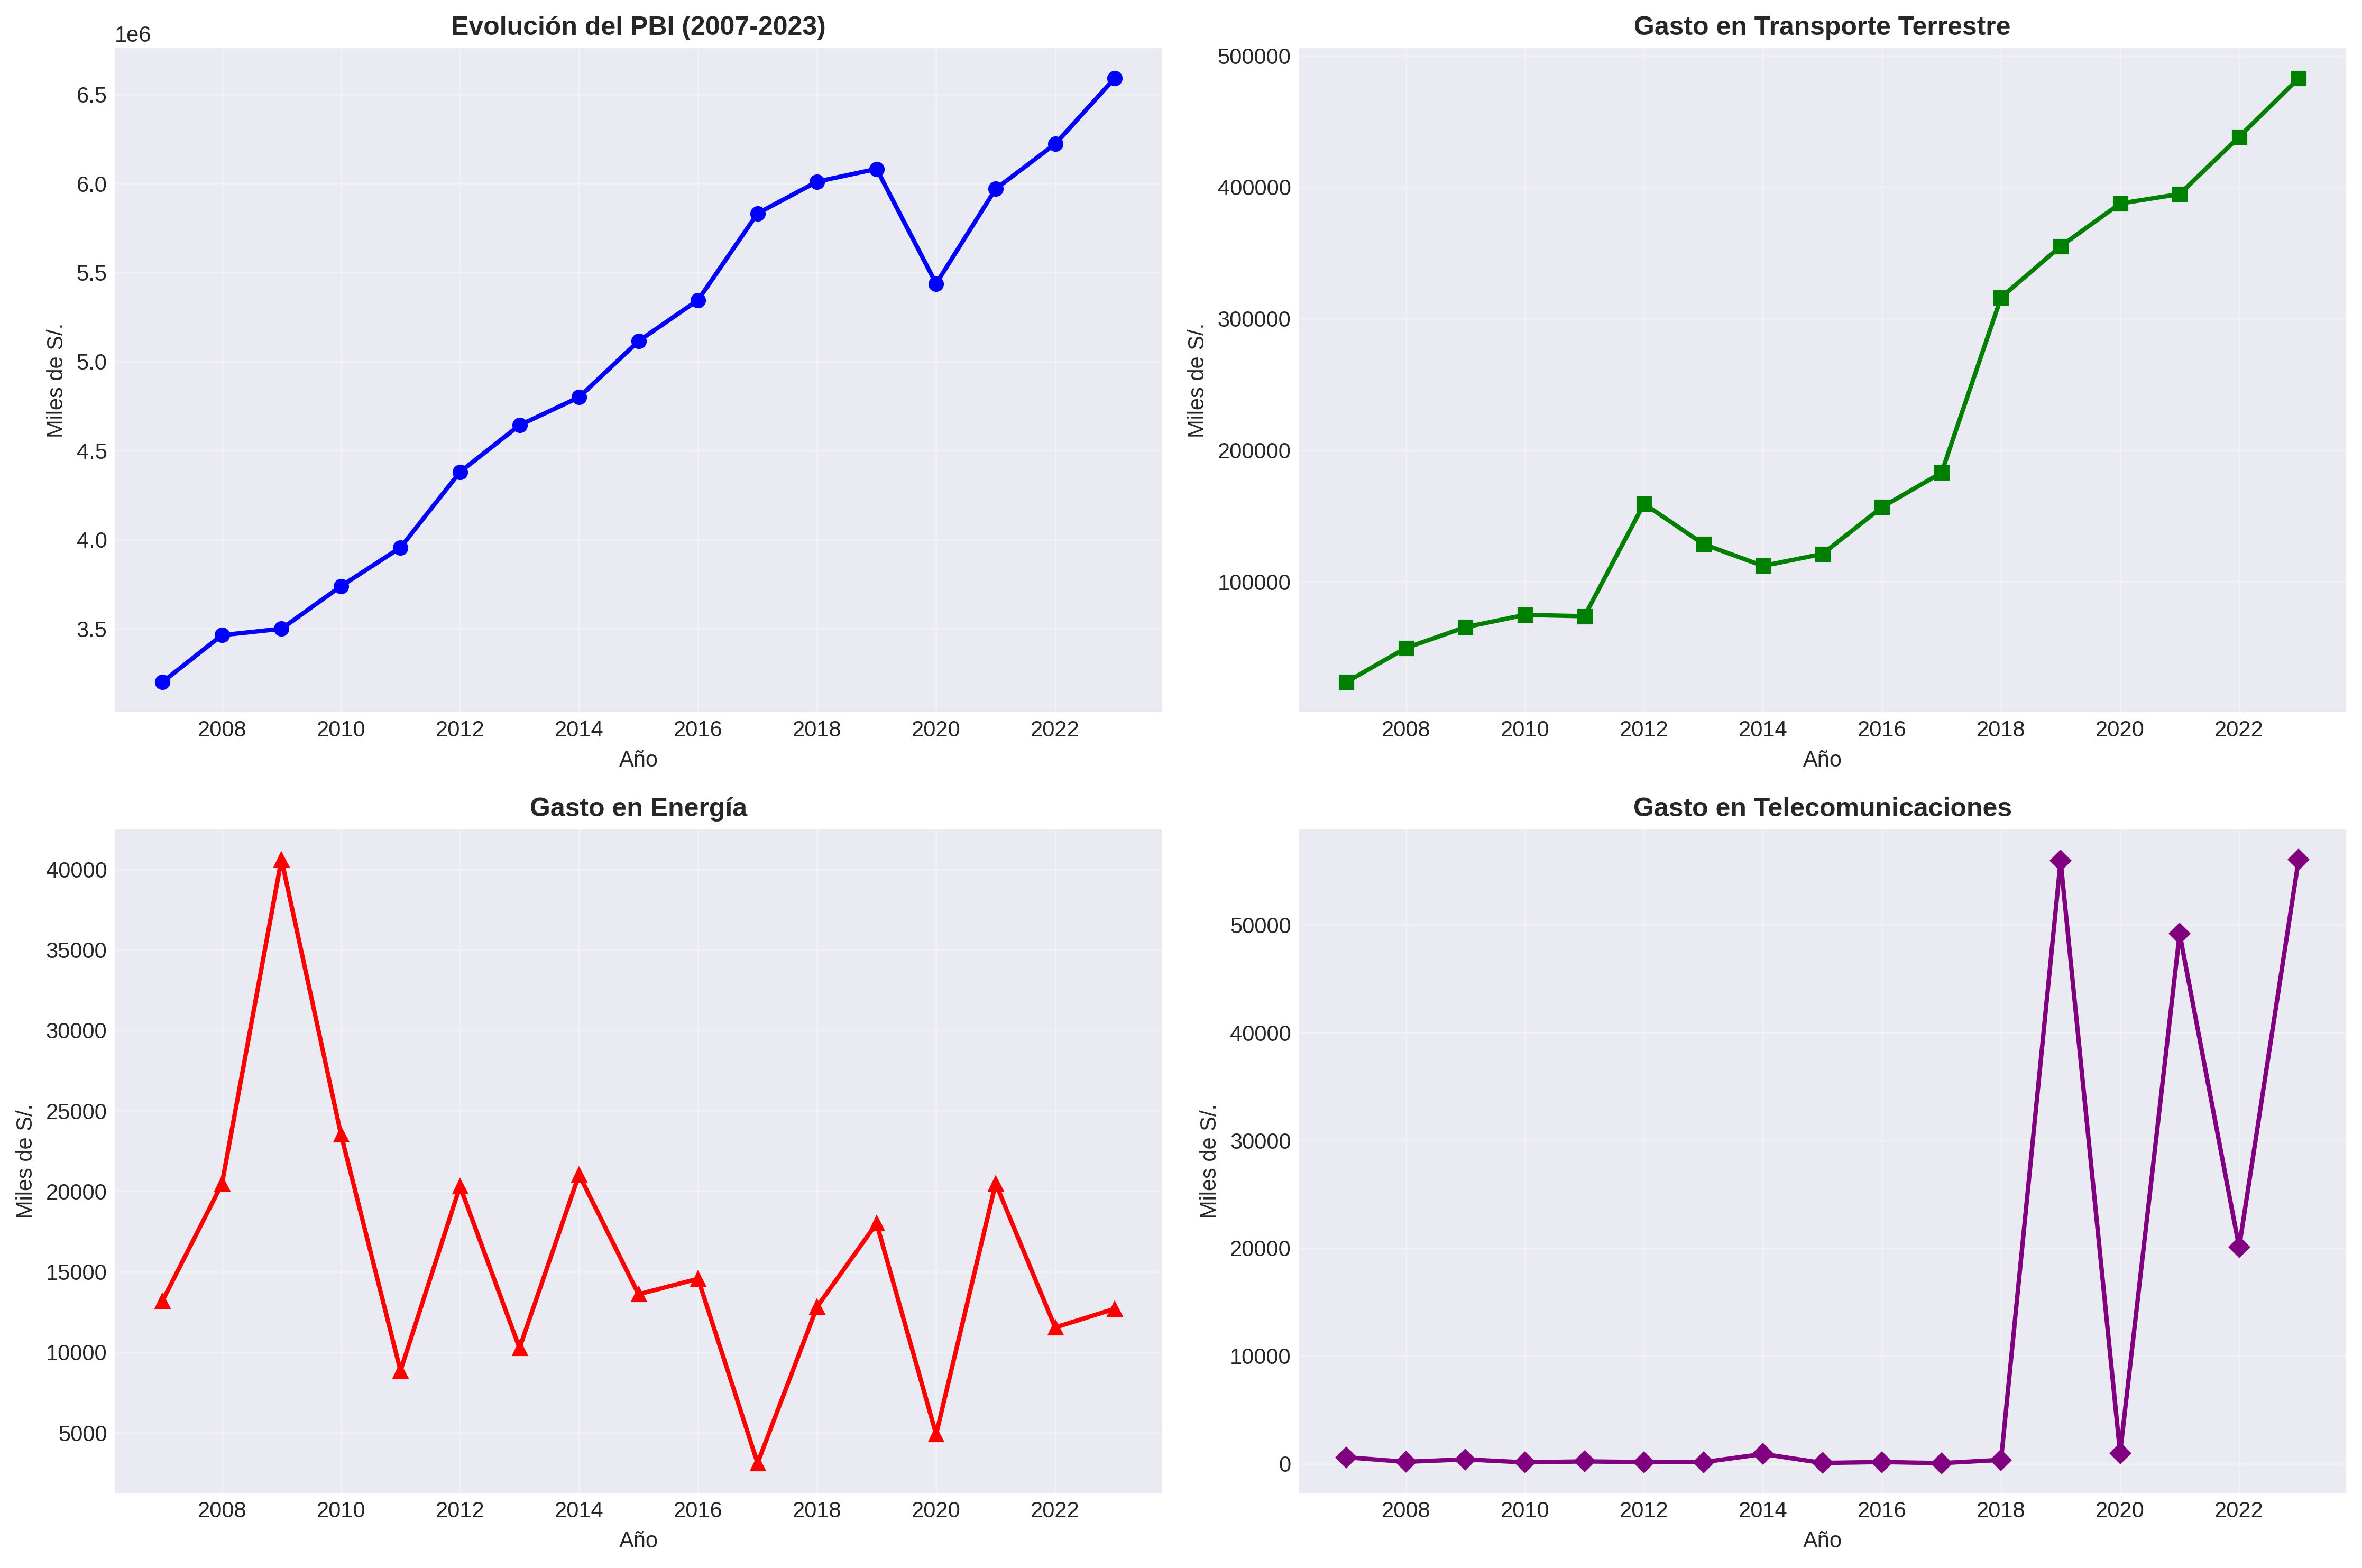


Visualización: 2_normalidad_datos_originales.png


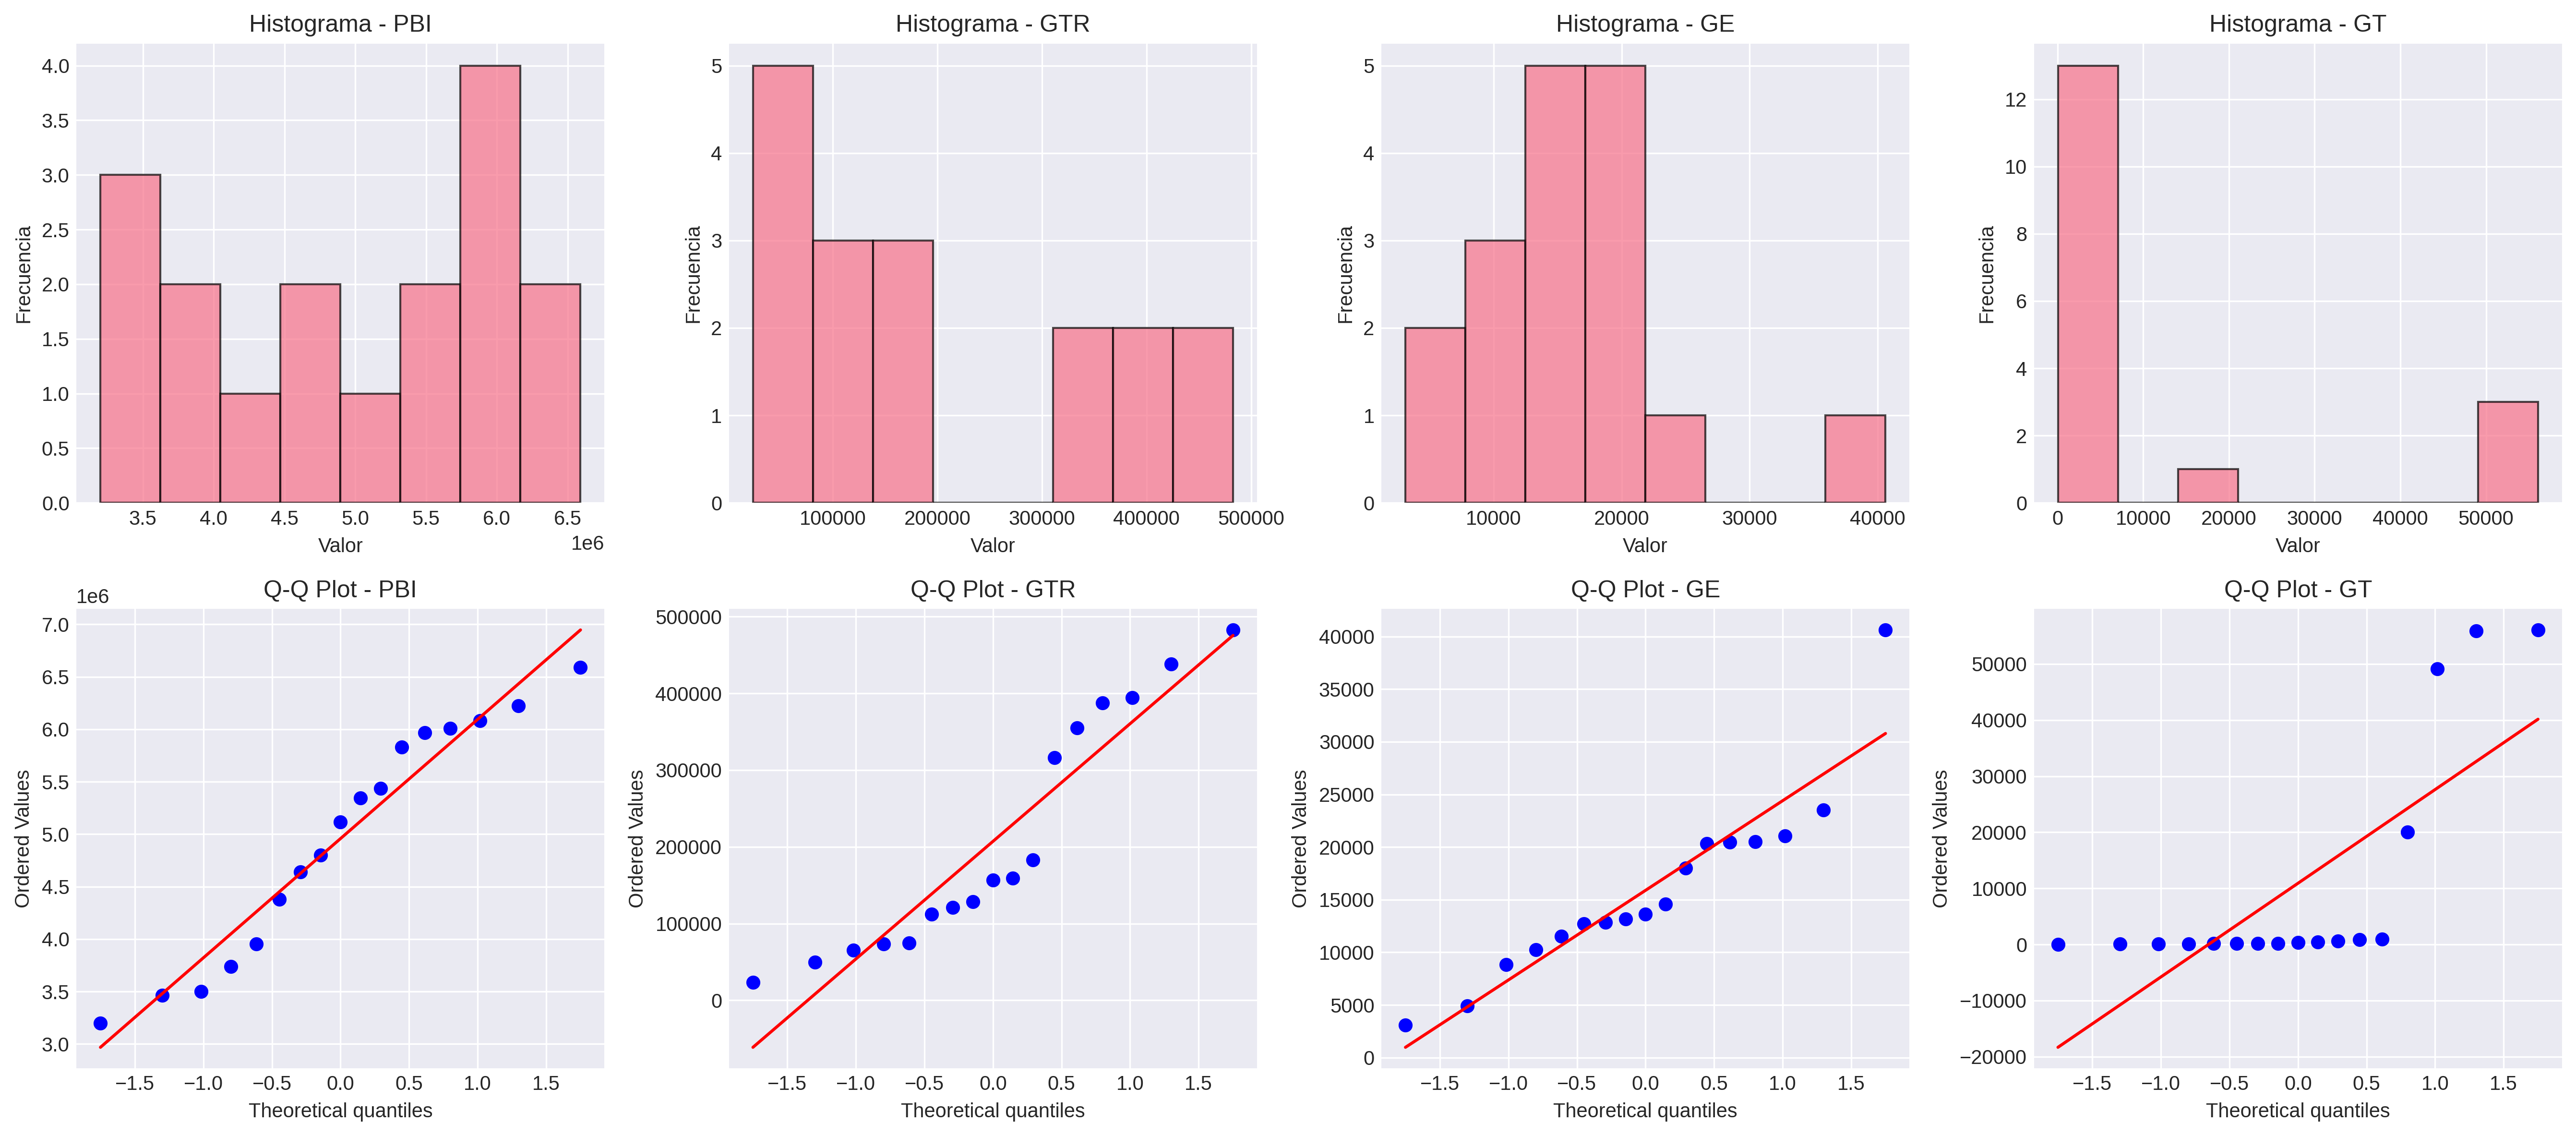


Visualización: 3_datos_logaritmicos.png


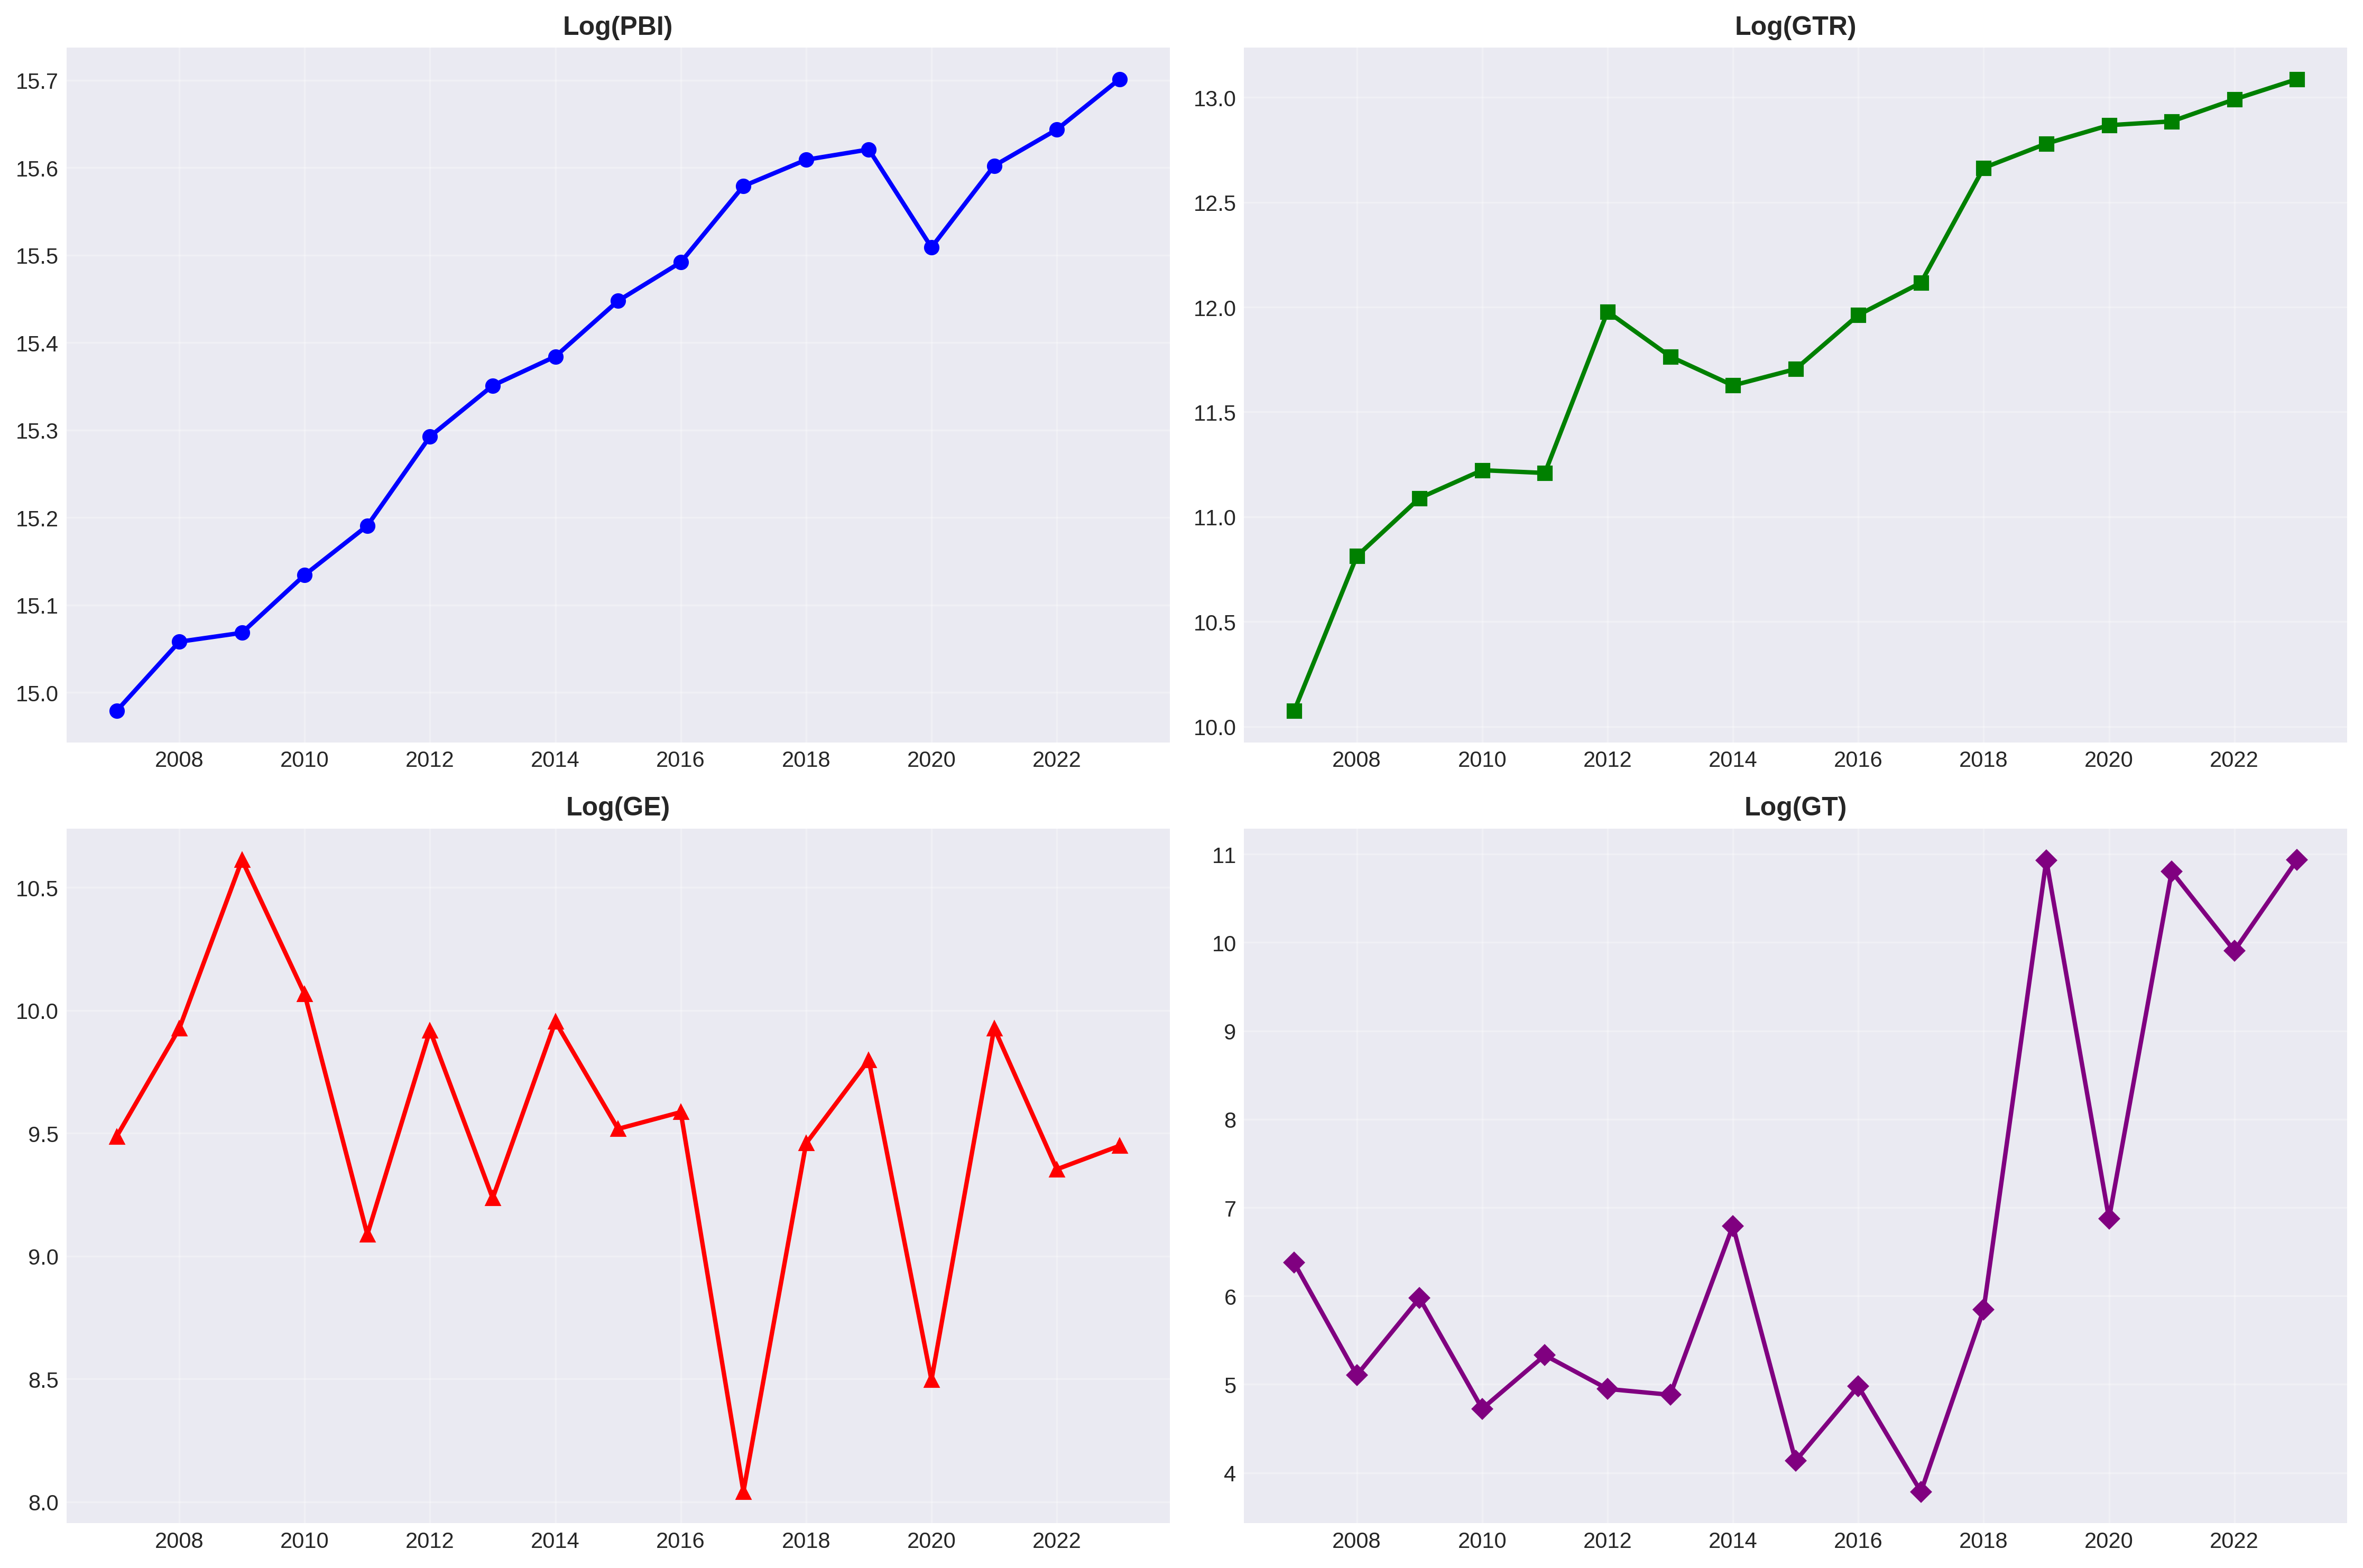


Visualización: 4_analisis_residuos_multiple.png


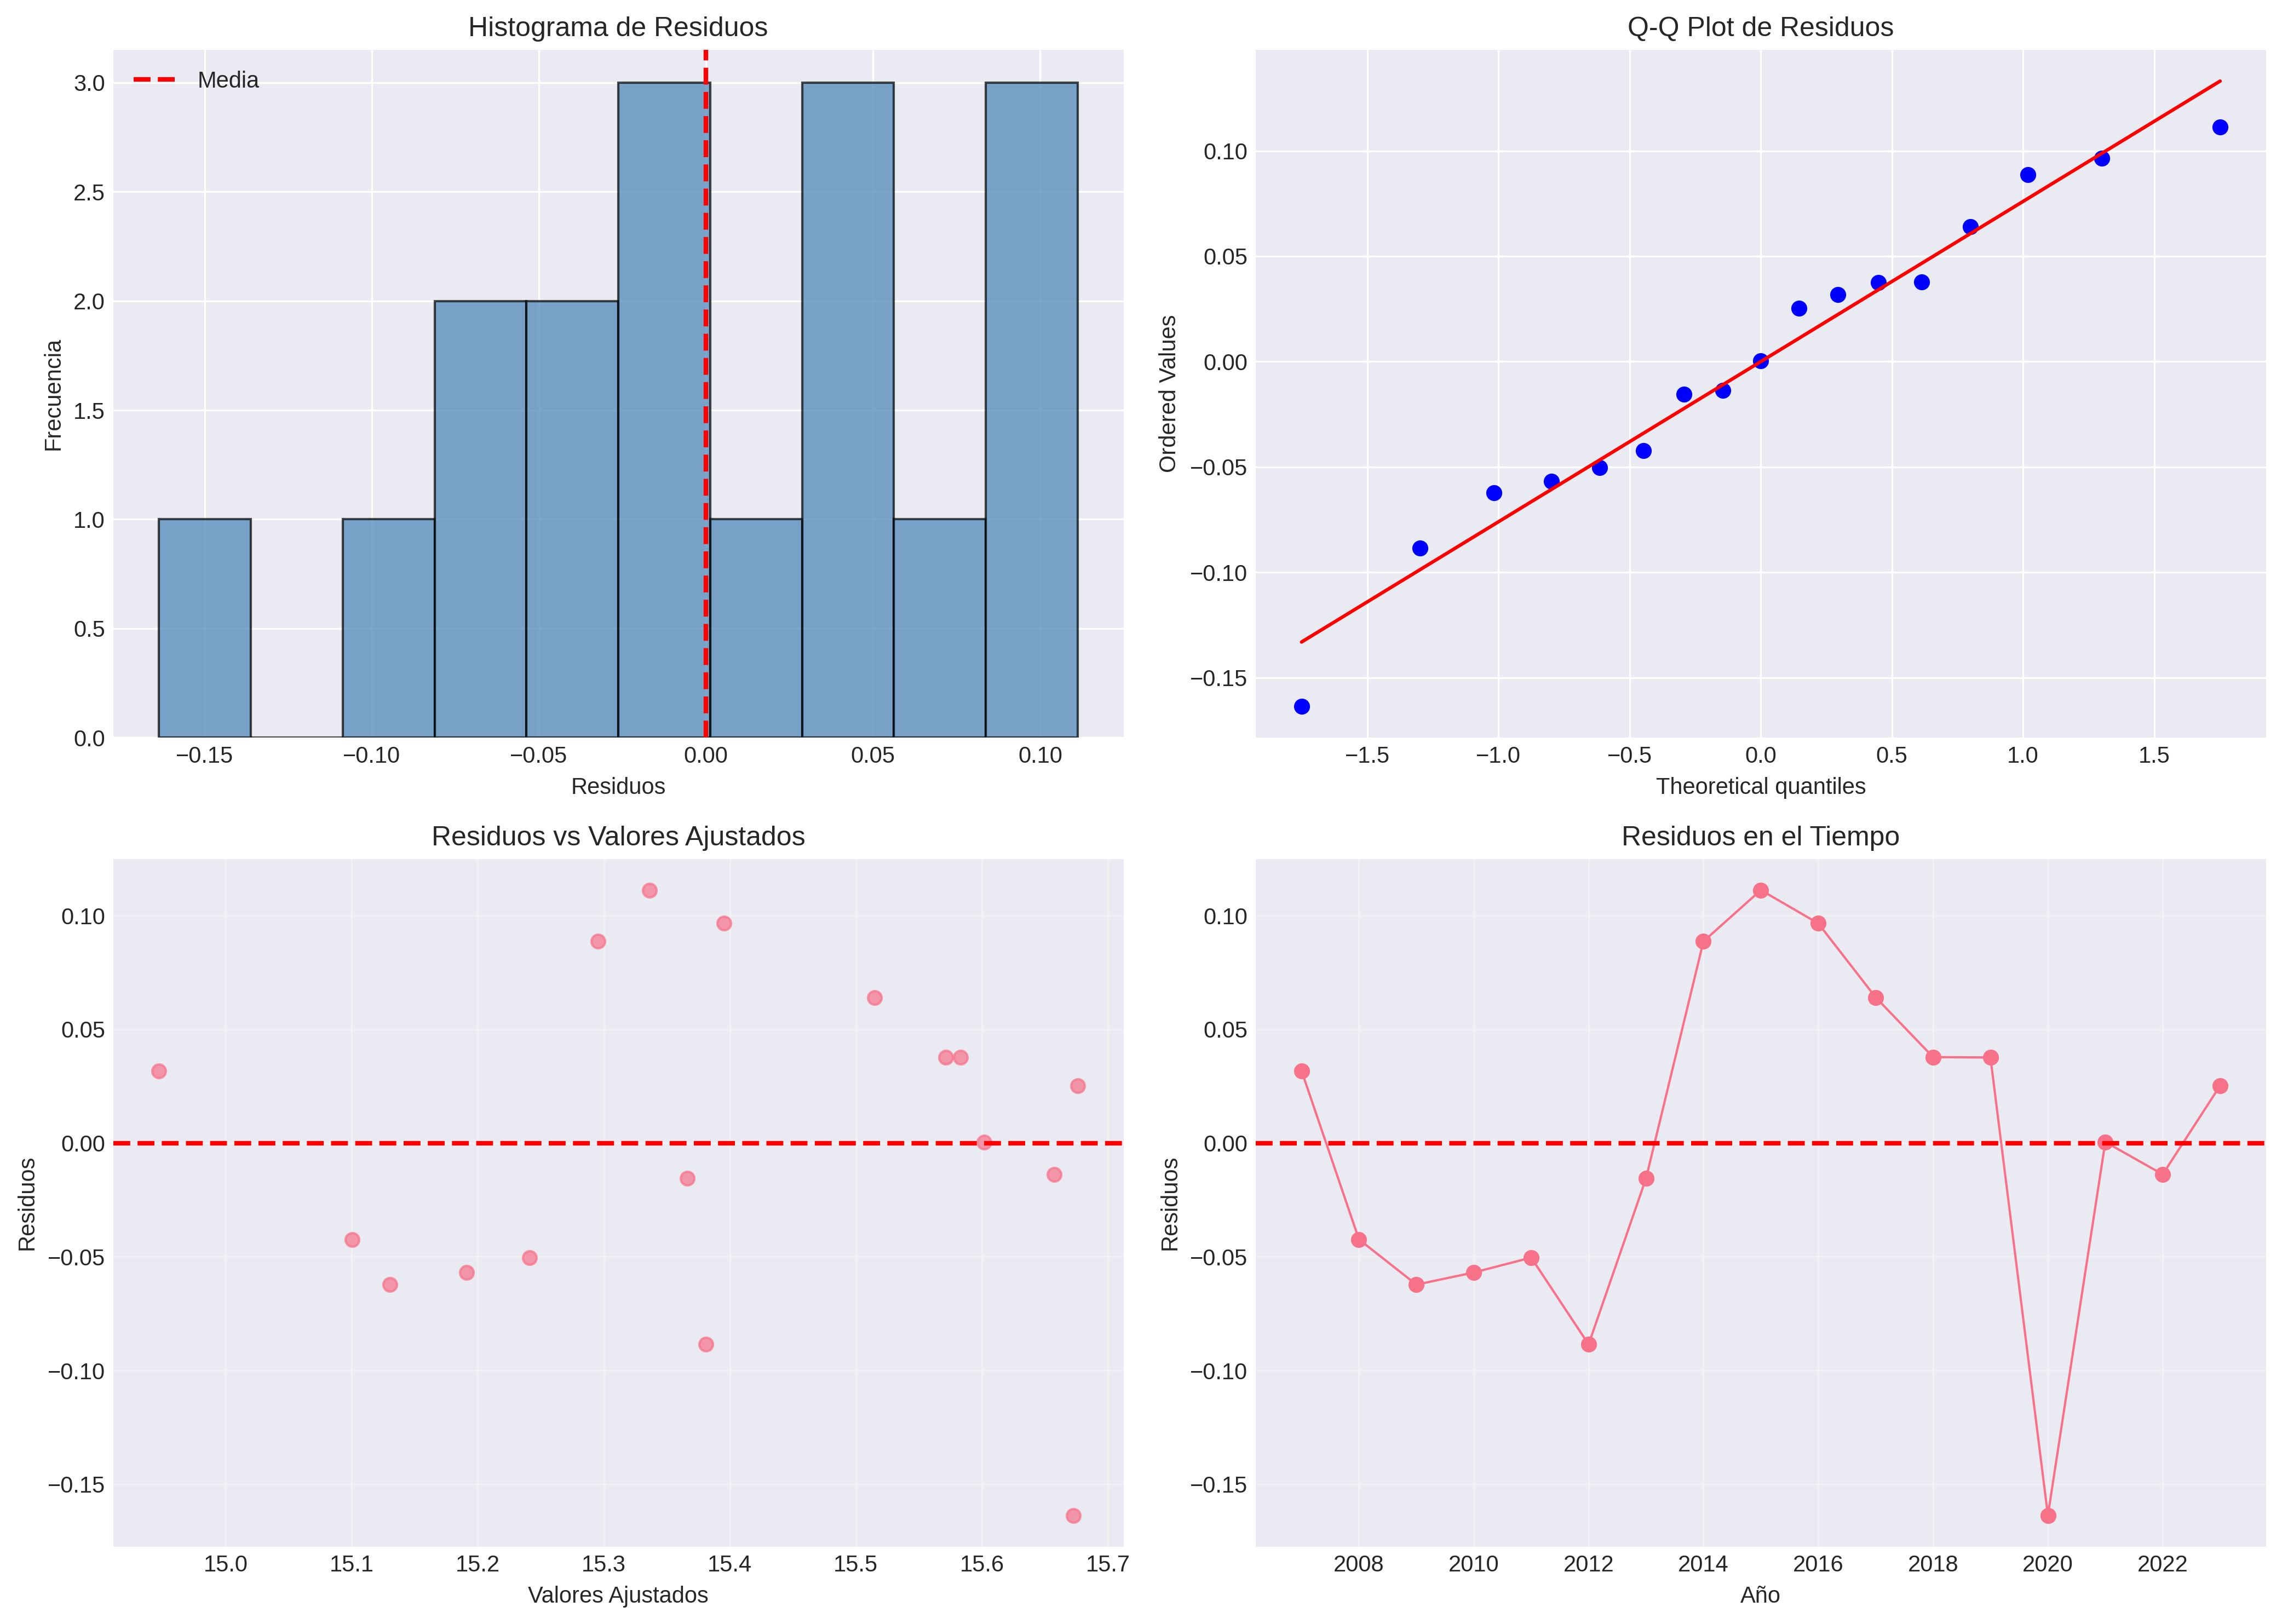


Visualización: 5_autocorrelacion_multiple.png


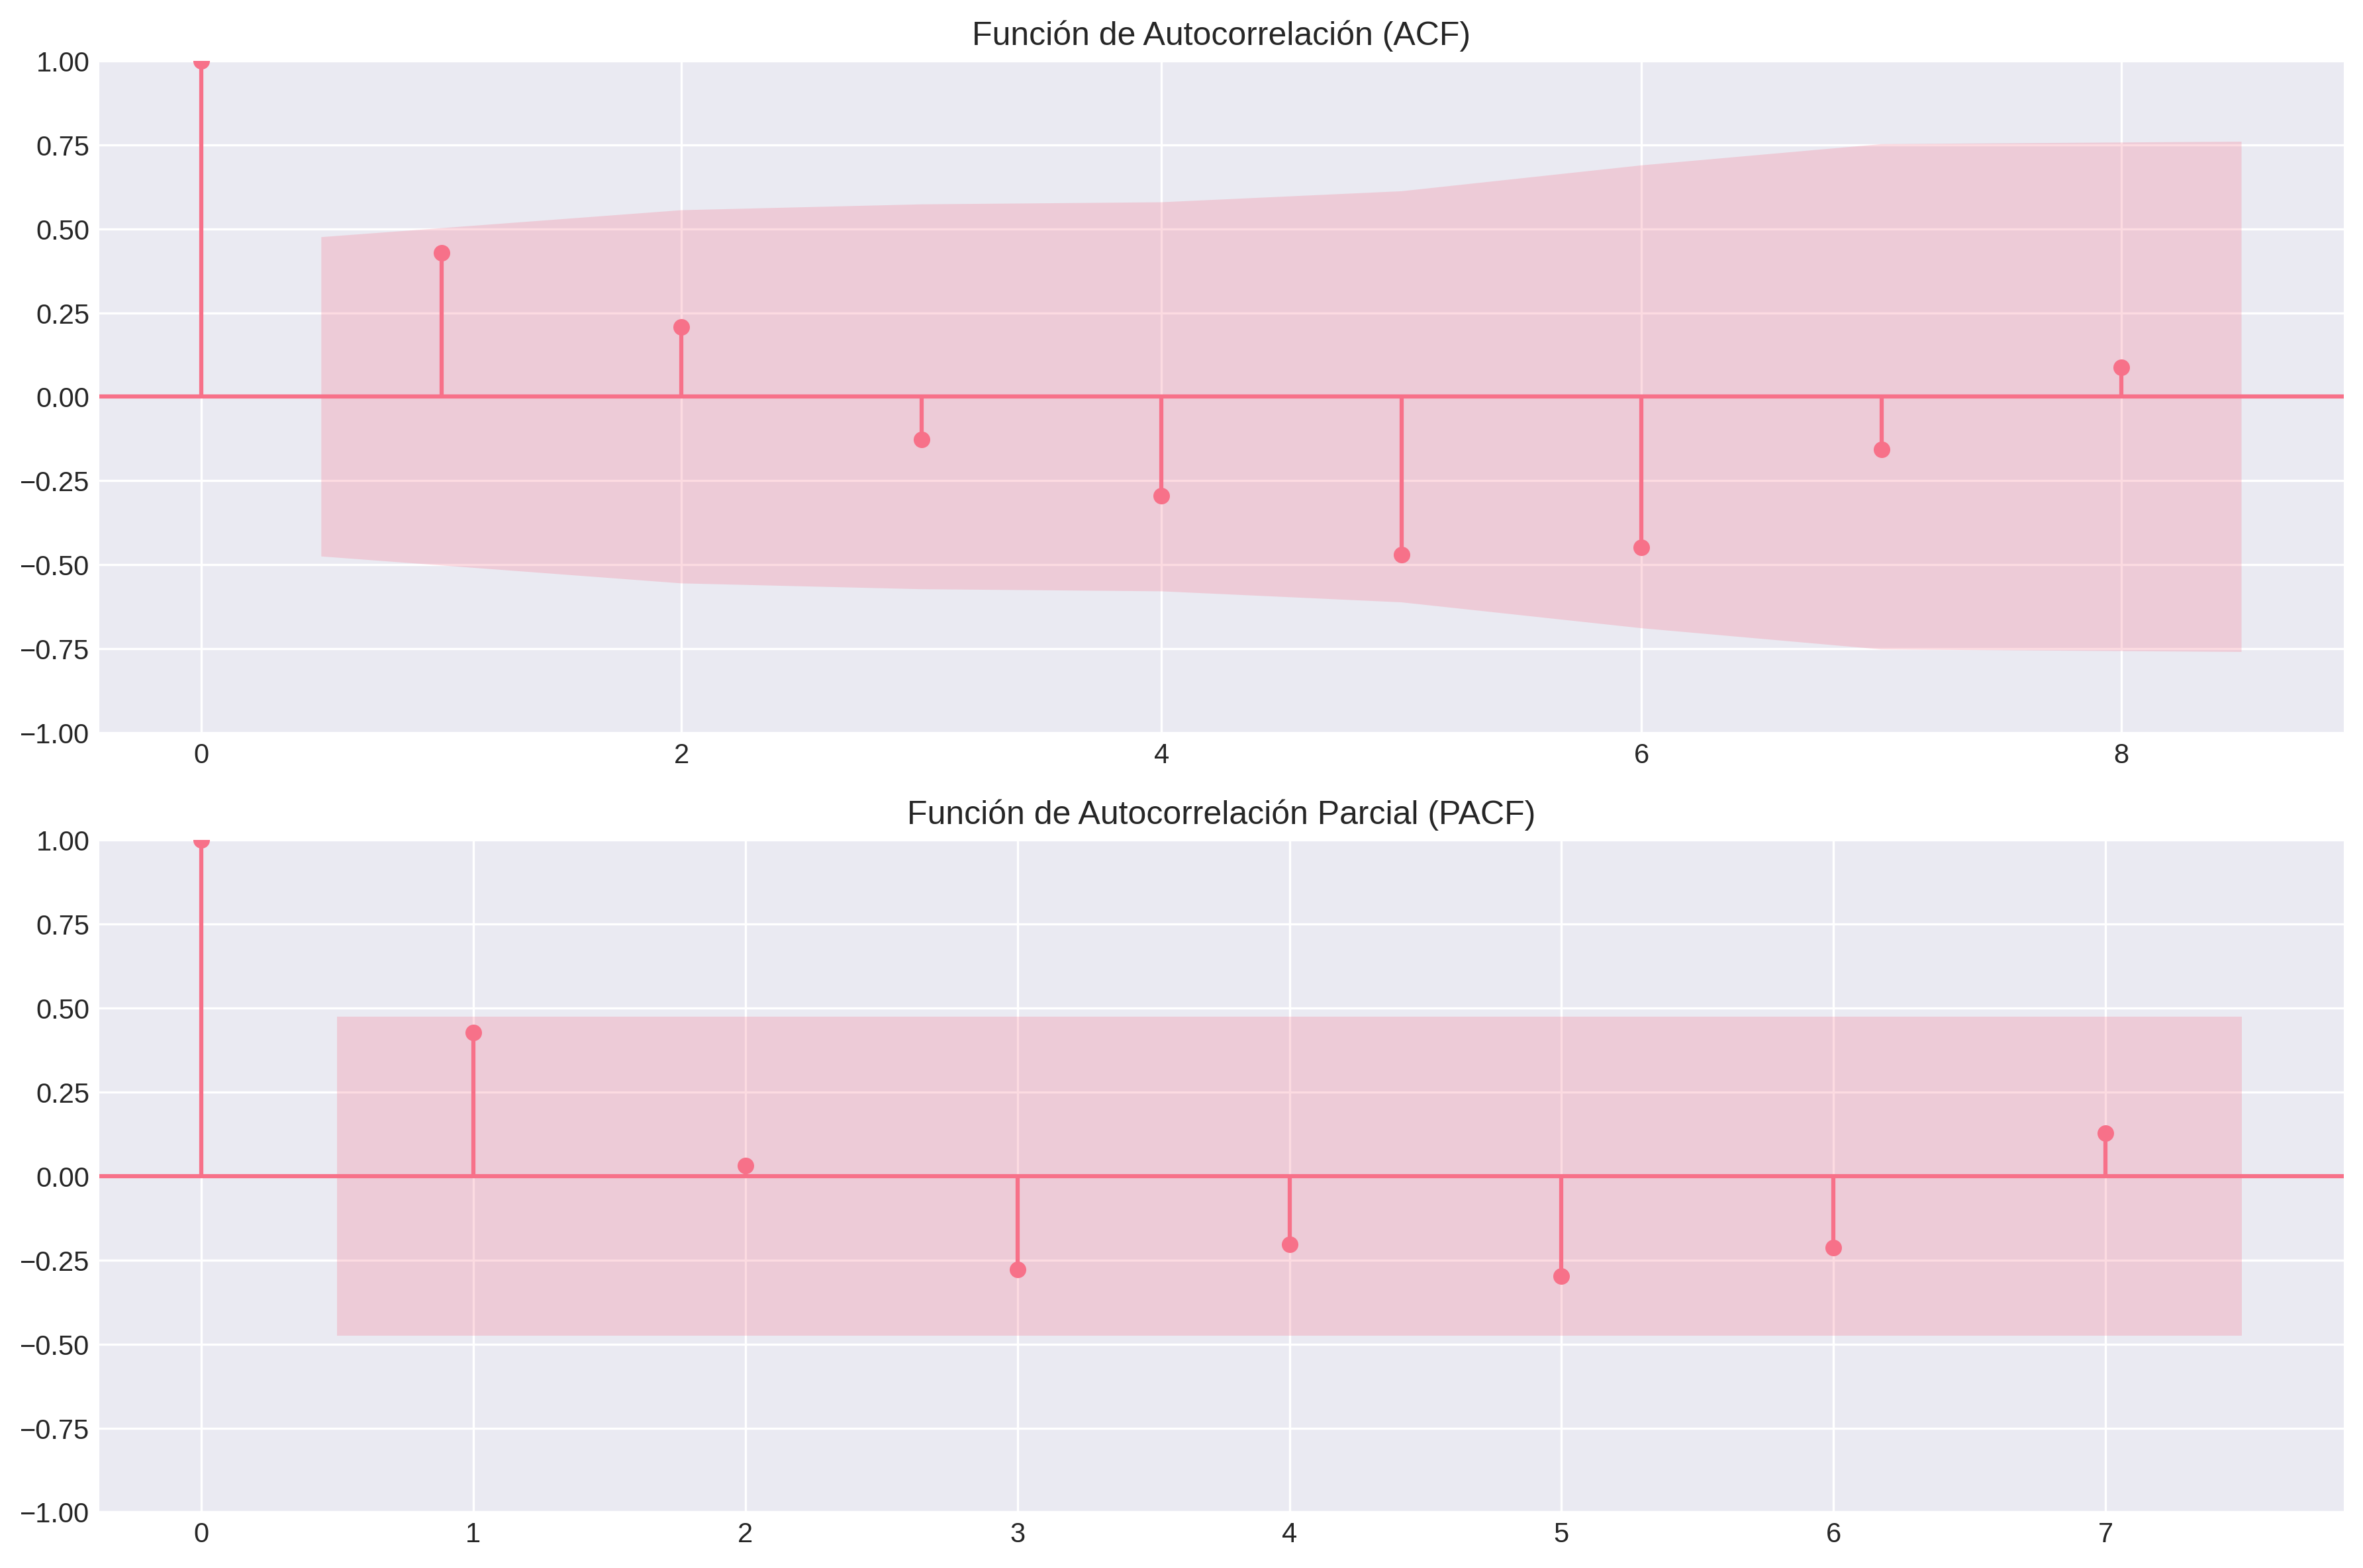


Visualización: 6_regresion_gtr.png


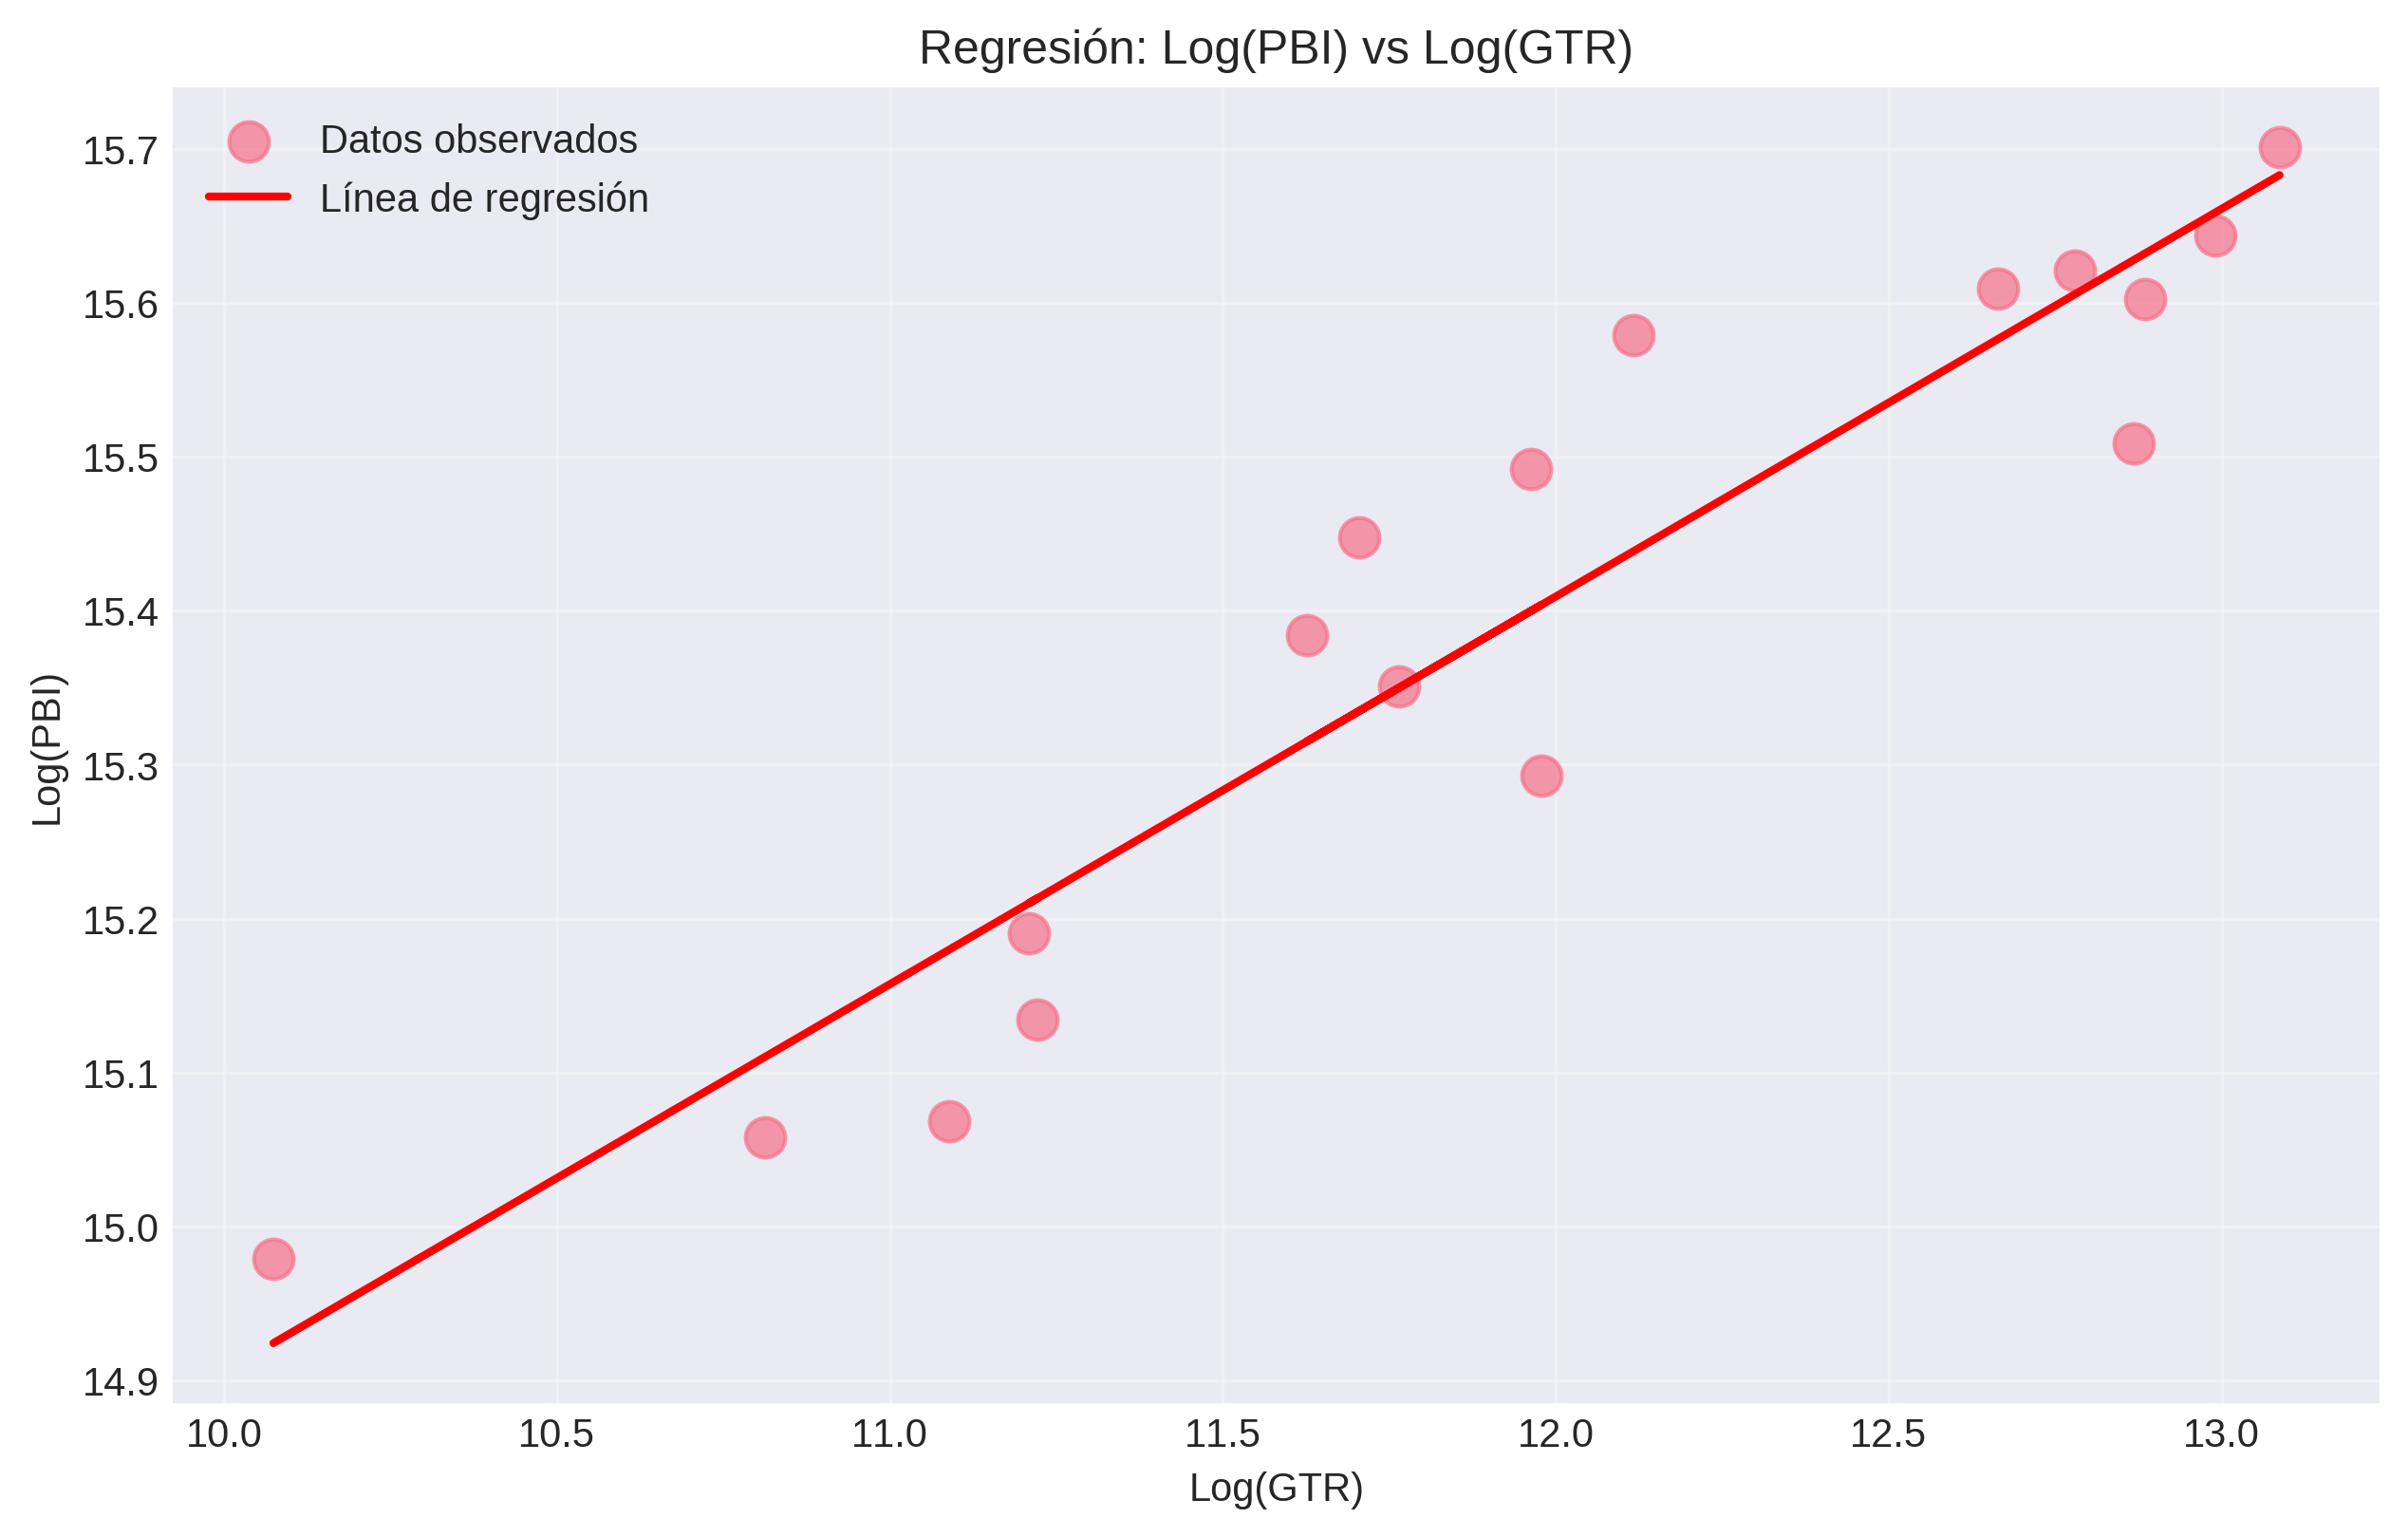


Visualización: 7_regresion_ge.png


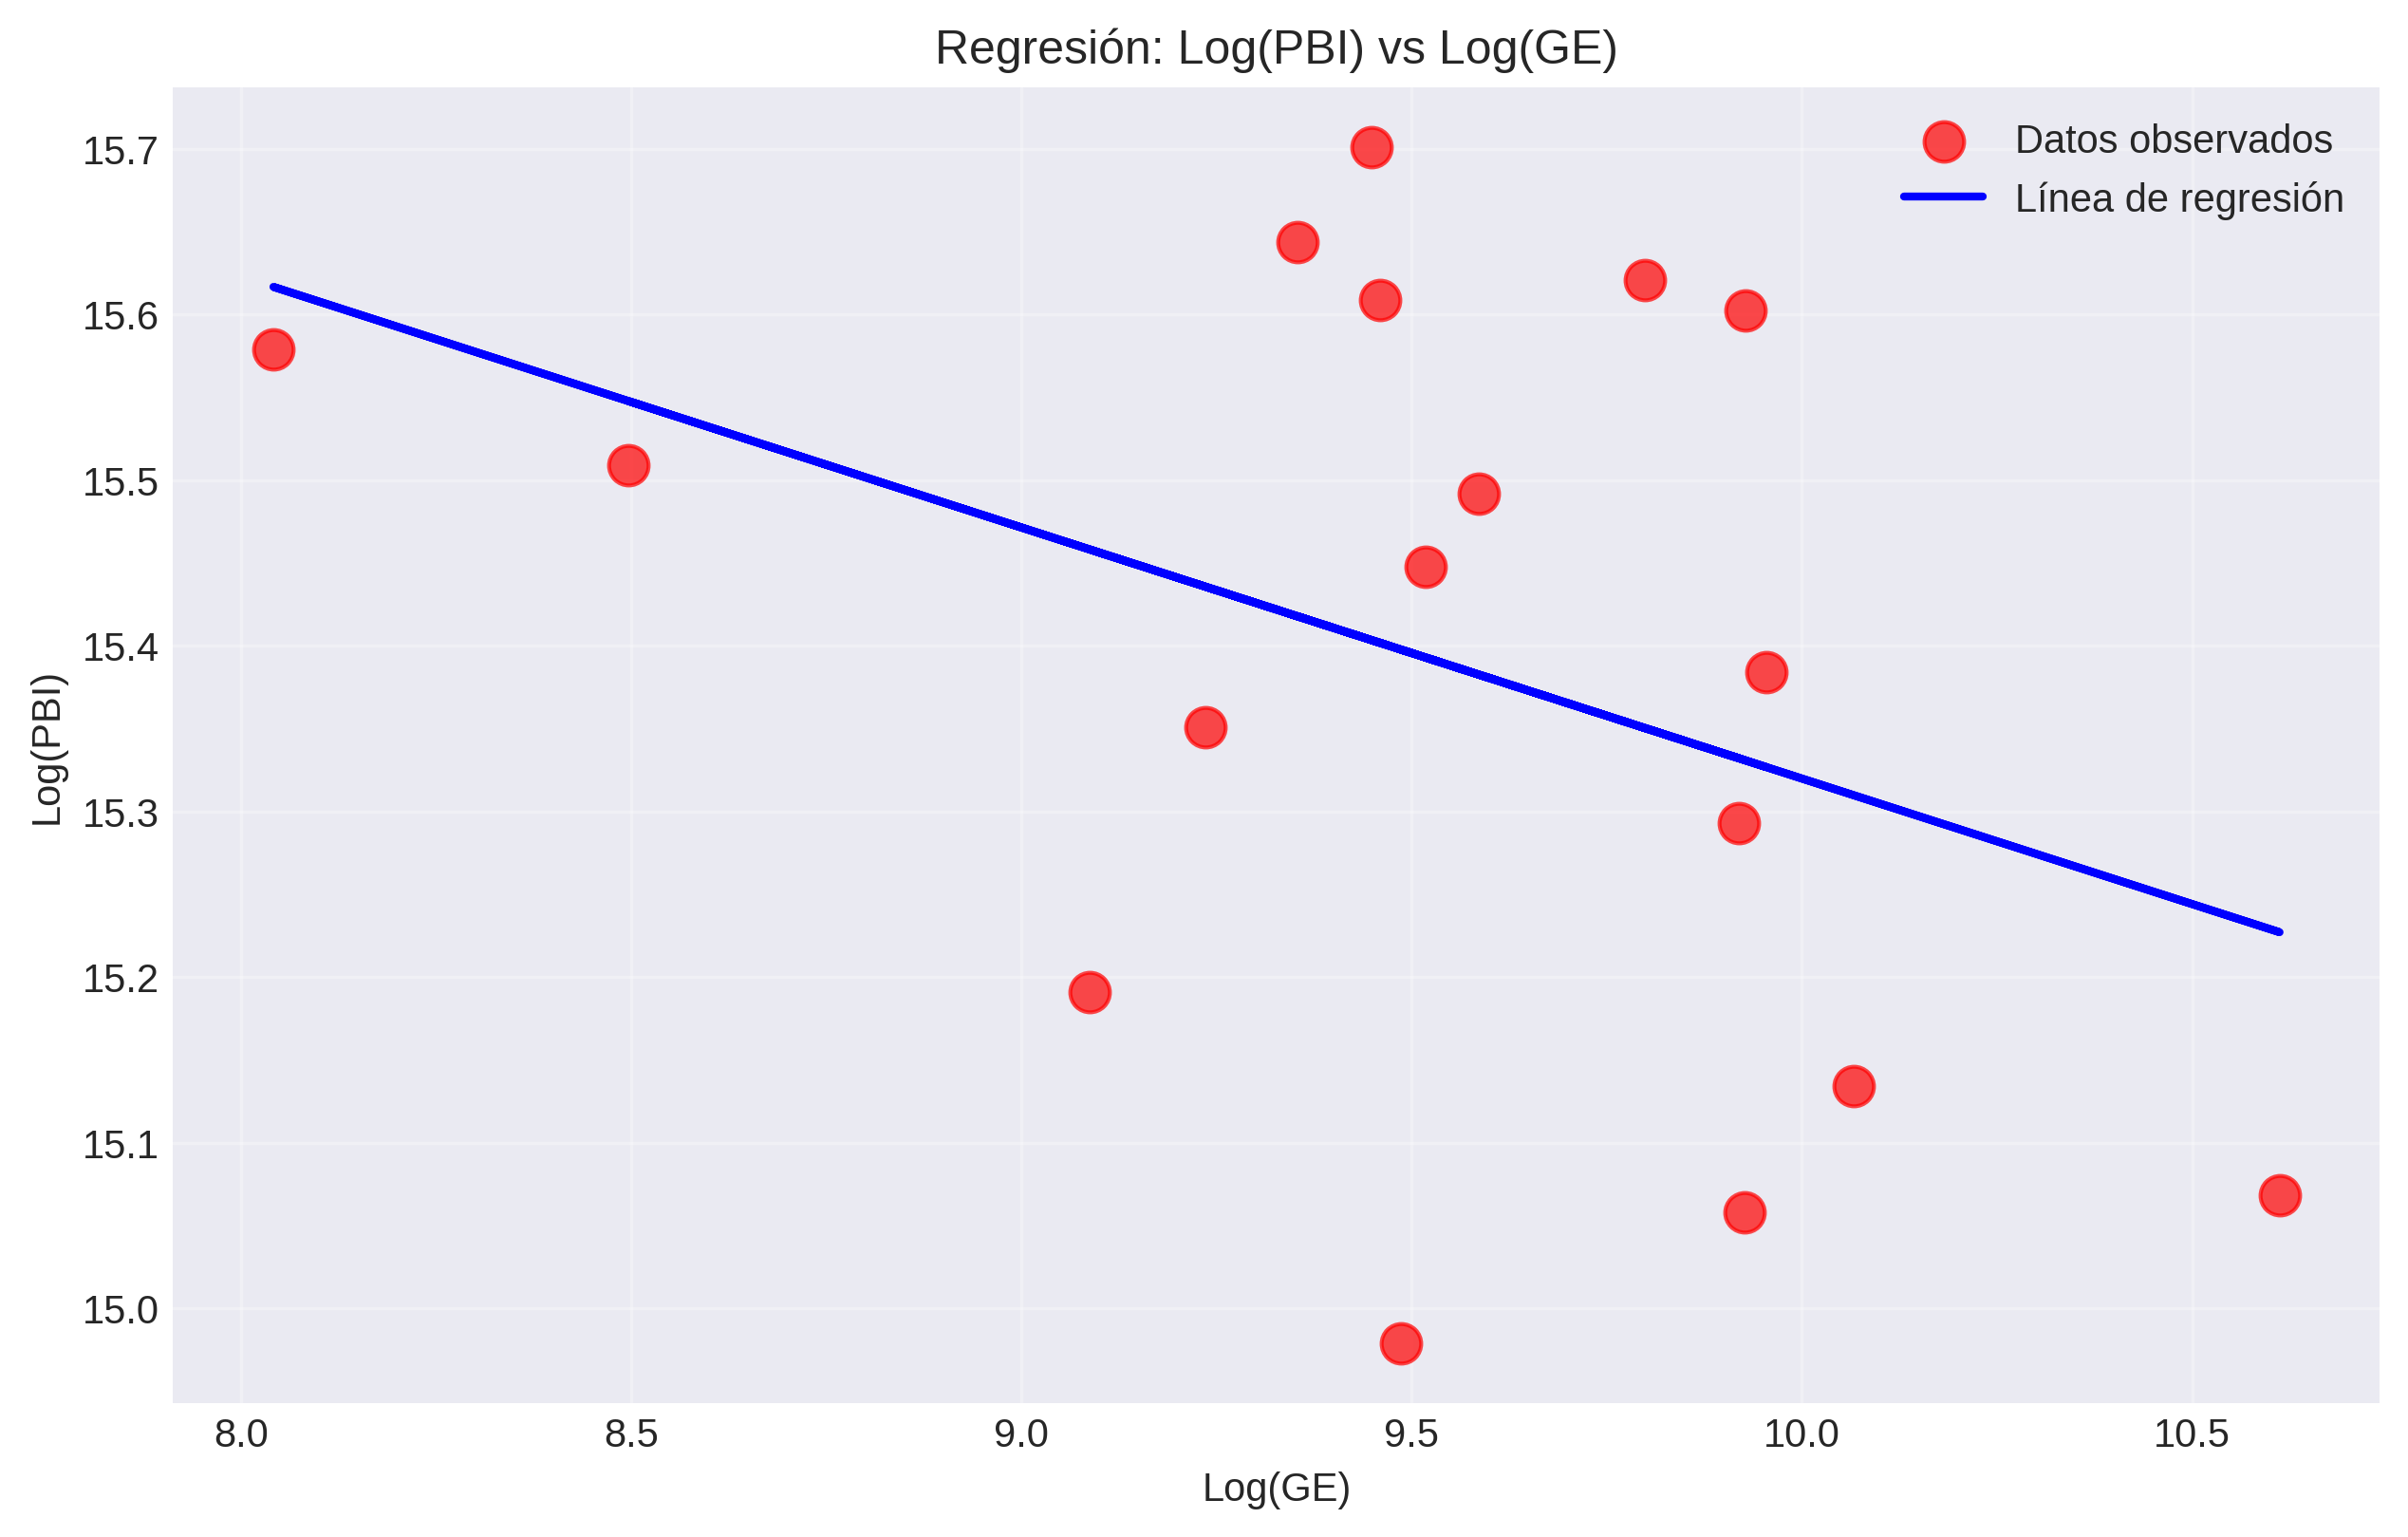


Visualización: 8_regresion_gt.png


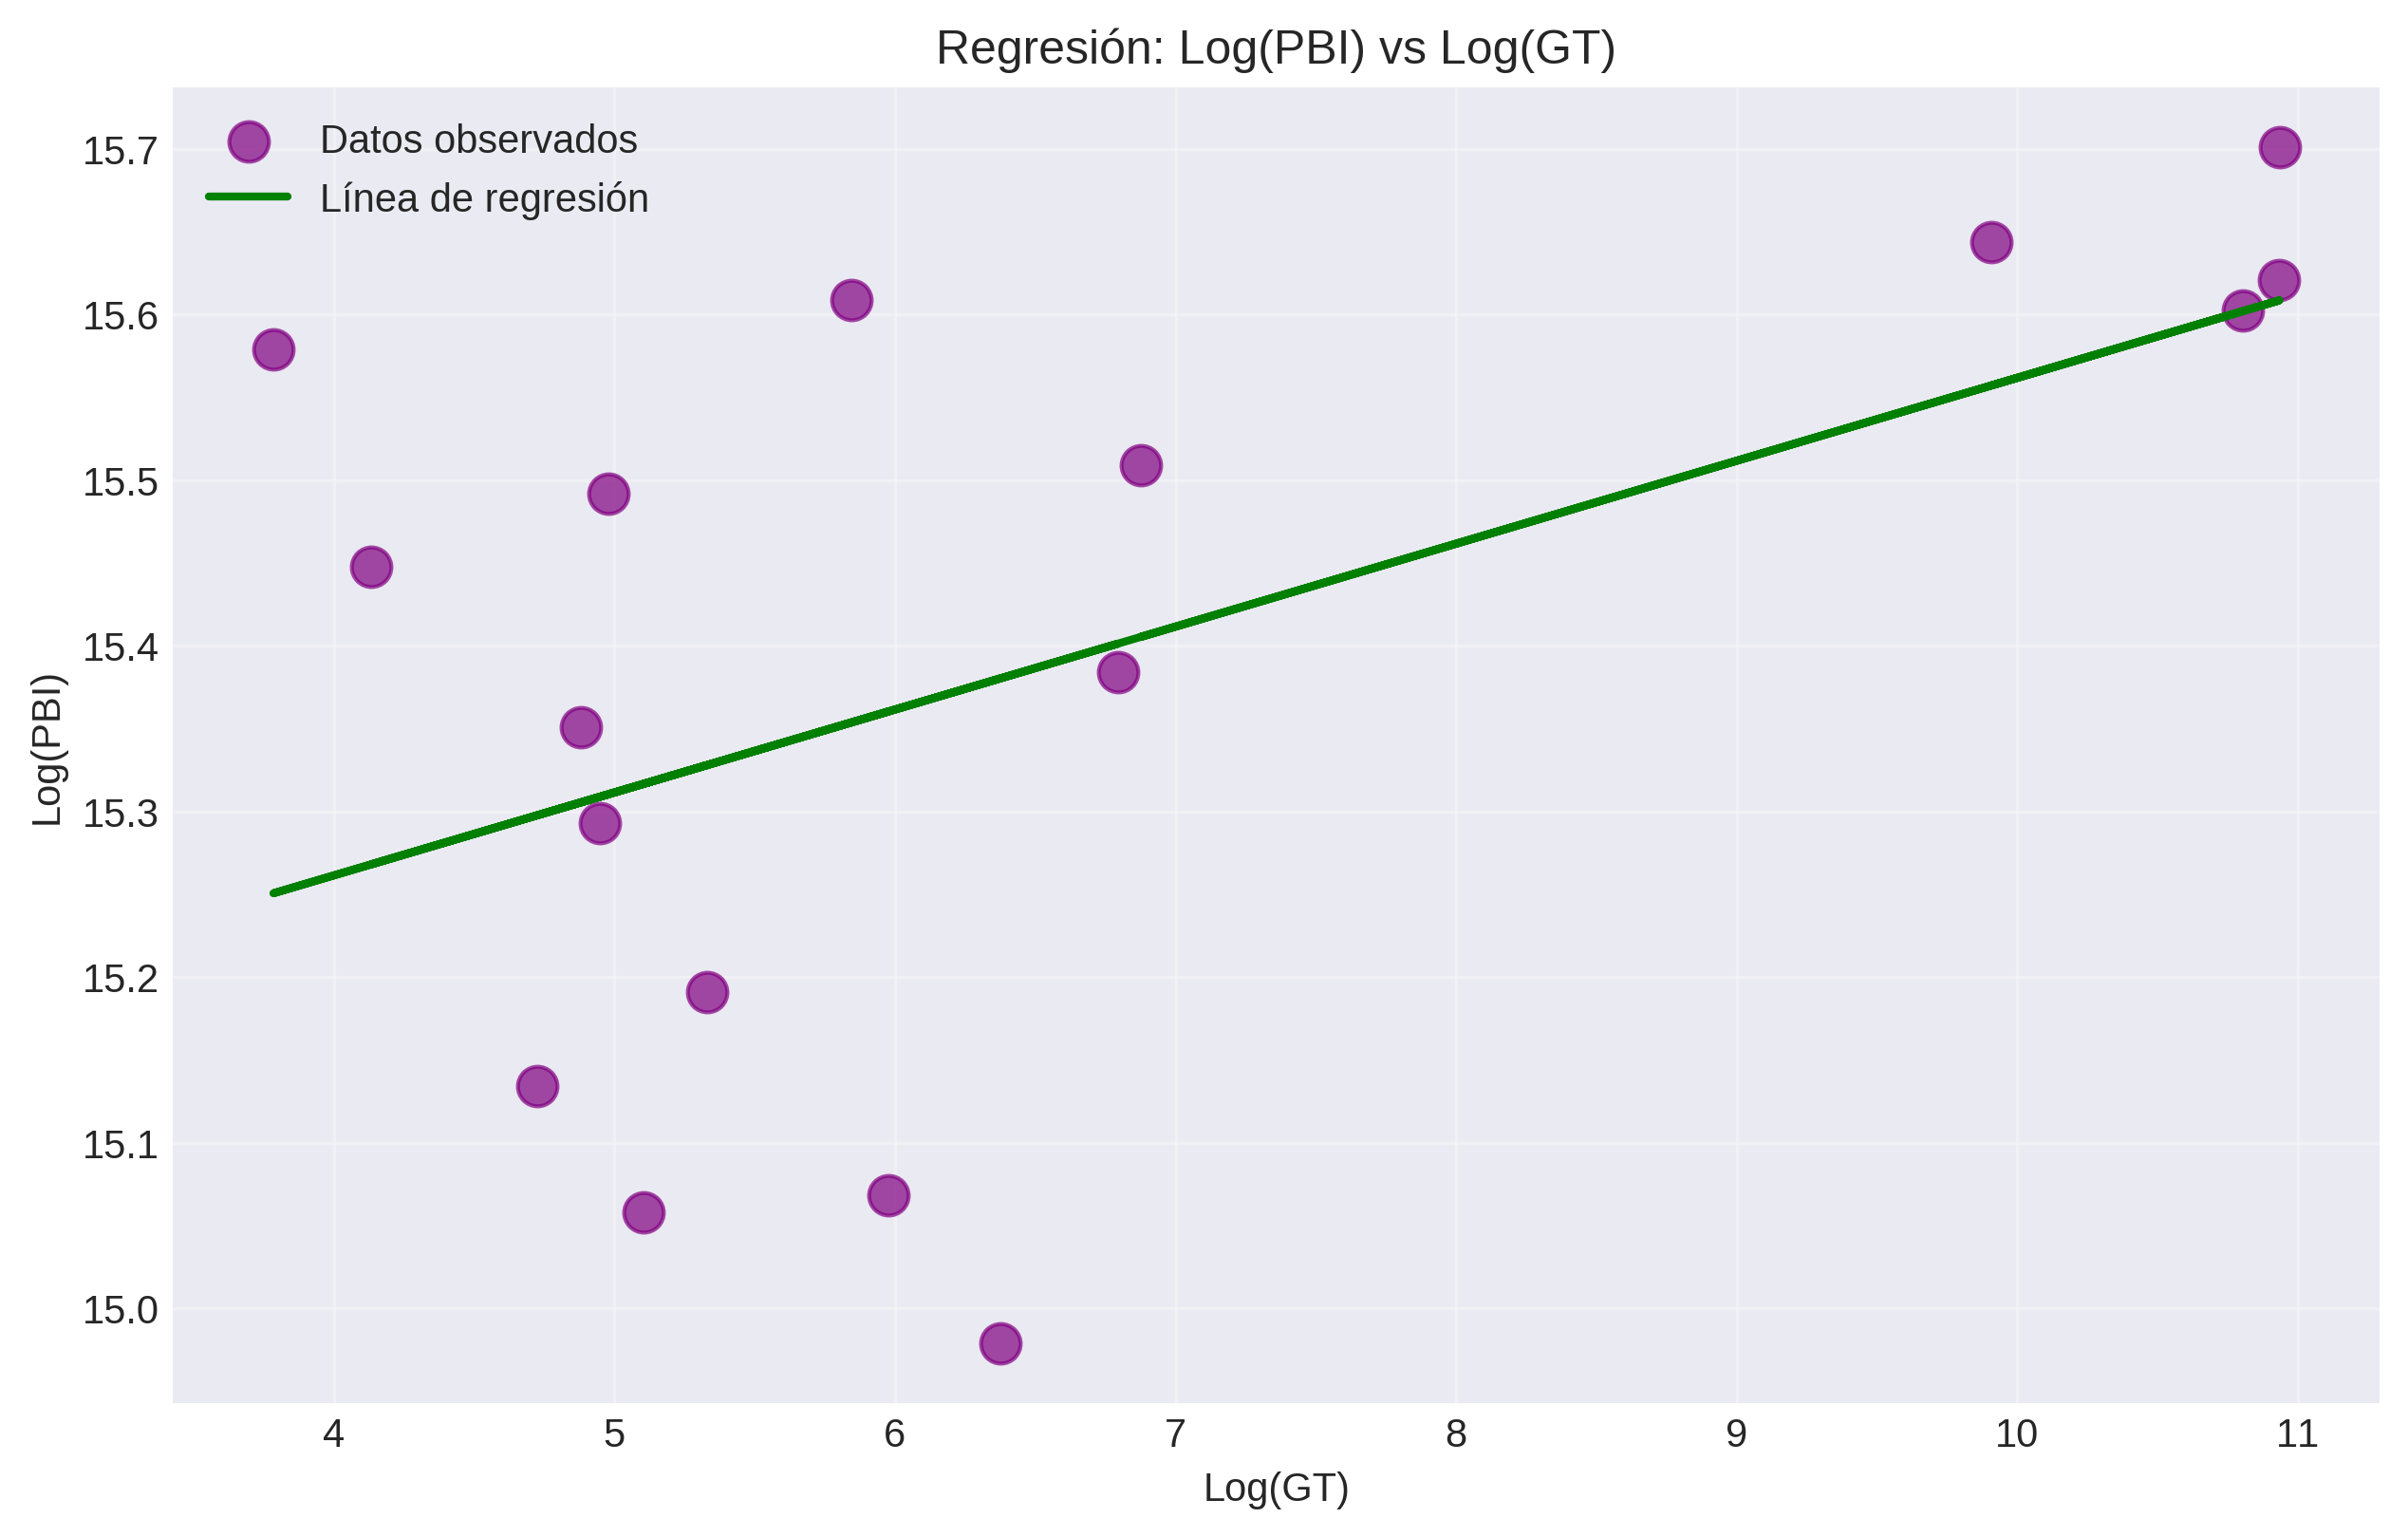


Visualización: 9_matriz_correlacion.png


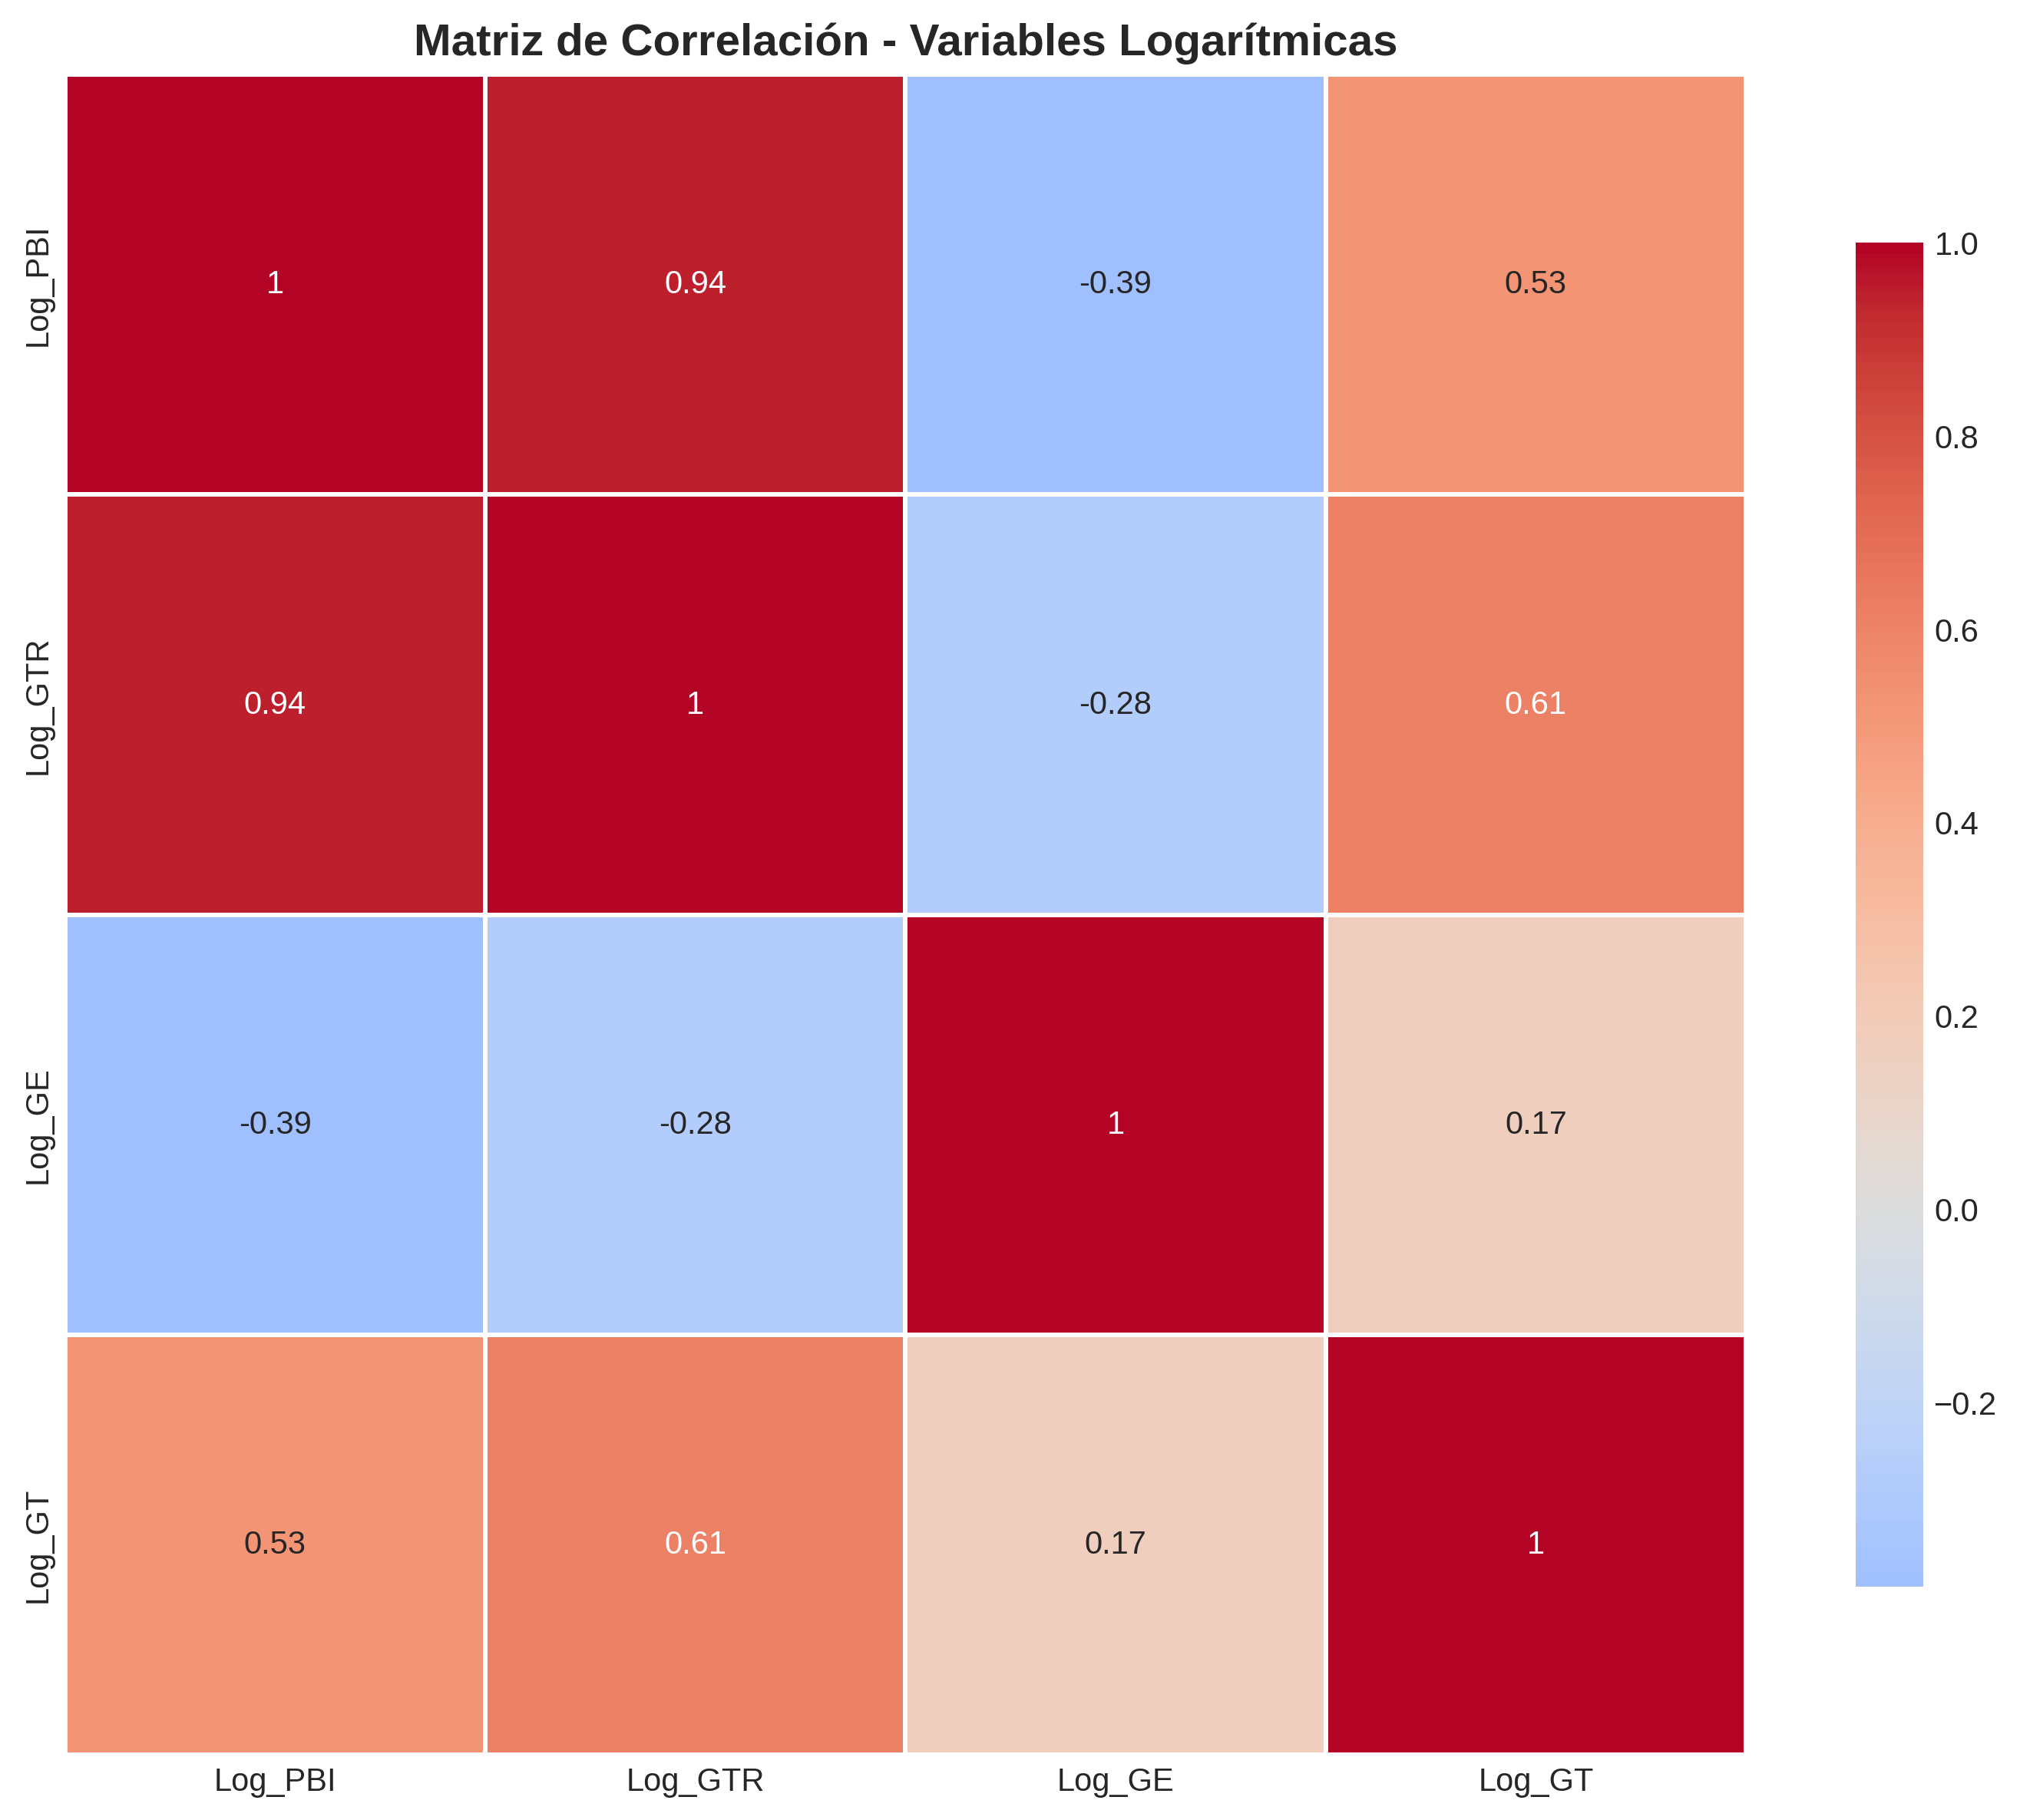


Visualización: 10_comparacion_modelos.png


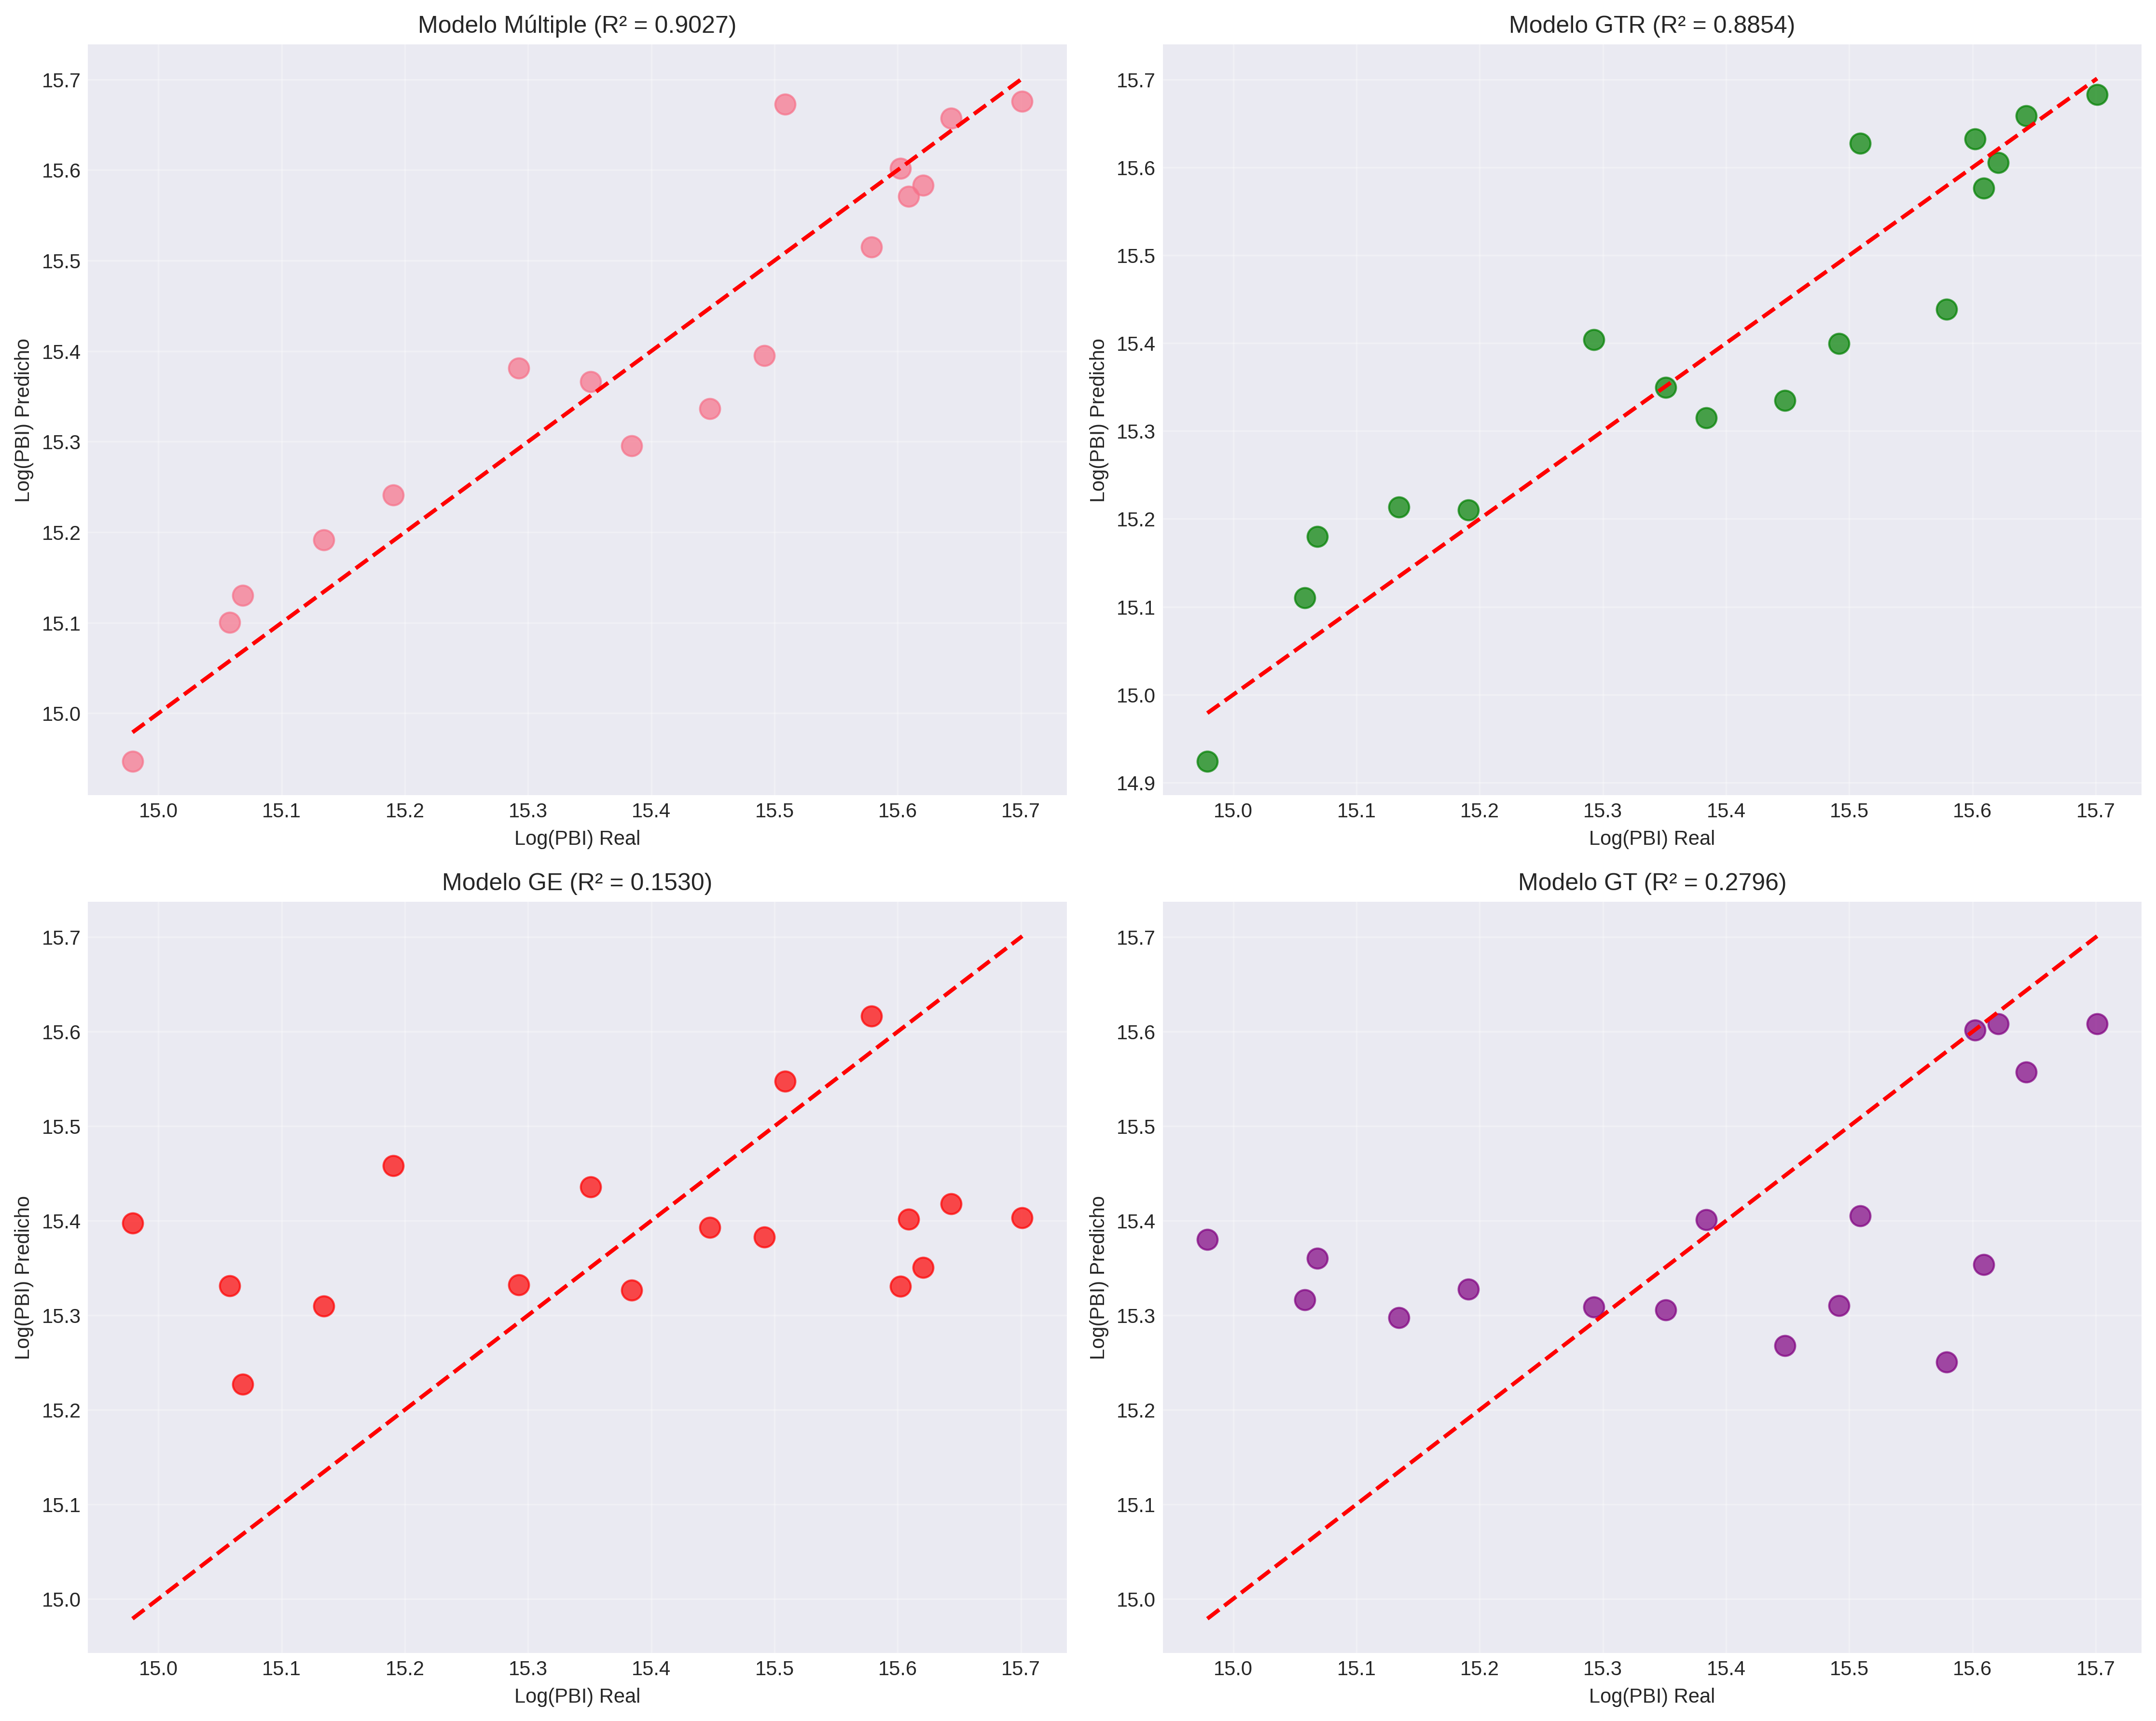

In [5]:
from IPython.display import Image, display
import os

output_dir = '/mnt/user-data/outputs/'

# List of generated image files in order
image_files = [
    '1_tendencias_datos_originales.png',
    '2_normalidad_datos_originales.png',
    '3_datos_logaritmicos.png',
    '4_analisis_residuos_multiple.png',
    '5_autocorrelacion_multiple.png',
    '6_regresion_gtr.png',
    '7_regresion_ge.png',
    '8_regresion_gt.png',
    '9_matriz_correlacion.png',
    '10_comparacion_modelos.png'
]

print("Mostrando todas las visualizaciones generadas:")
print("\n" + "="*80)

for img_file in image_files:
    img_path = os.path.join(output_dir, img_file)
    if os.path.exists(img_path):
        print(f"Visualización: {img_file}")
        display(Image(filename=img_path))
        print("\n" + "="*80)
    else:
        print(f"Advertencia: {img_file} no encontrado en {output_dir}")
        print("\n" + "="*80)
